In [1]:
# Recorre todo el laberinto

In [5]:
import copy
from noise import pnoise2
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import deque

In [6]:
np.random.seed(42)
random.seed(42)

def generar_laberinto_conectado(filas, columnas):
    # Asegurar que filas y columnas sean impares para el algoritmo
    if filas % 2 == 0:
        filas += 1
    if columnas % 2 == 0:
        columnas += 1
        
    # Inicializar laberinto con todas las paredes
    laberinto = [['1' for _ in range(columnas)] for _ in range(filas)]
    visitado = [[False for _ in range(columnas)] for _ in range(filas)]
    
    def vecinos(x, y):
        dirs = [(-2,0),(2,0),(0,-2),(0,2)]
        result = []
        for dx, dy in dirs:
            nx, ny = x+dx, y+dy
            if 0 <= nx < filas and 0 <= ny < columnas and not visitado[nx][ny]:
                result.append((nx, ny))
        random.shuffle(result)
        return result
    
    def dfs(x, y):
        visitado[x][y] = True
        laberinto[x][y] = '0'
        
        for nx, ny in vecinos(x, y):
            if not visitado[nx][ny]:
                # Elimina la pared entre celdas
                laberinto[(x+nx)//2][(y+ny)//2] = '0'
                dfs(nx, ny)
    
    # Comenzar desde una posición impar (esquina superior izquierda válida)
    start_x, start_y = 1, 1
    if start_x < filas and start_y < columnas:
        dfs(start_x, start_y)
    
    # Crear algunas aberturas adicionales para hacer el laberinto más interesante
    # y asegurar que no queden áreas completamente aisladas
    for i in range(3, filas-1, 4):
        for j in range(3, columnas-1, 4):
            if random.random() < 0.3:  # 30% probabilidad de crear apertura
                if i > 0 and laberinto[i-1][j] == '1':
                    laberinto[i-1][j] = '0'
                elif j > 0 and laberinto[i][j-1] == '1':
                    laberinto[i][j-1] = '0'
    
    return laberinto

laberinto_conectado = generar_laberinto_conectado(20, 20)

for fila in laberinto_conectado:
    print(''.join(fila))


111111111111111111111
100000100010000010001
111010101010111010101
100000001000100000101
101111101111101111101
100000101000000000001
111110101110101111111
100000100000100010001
101111111010111011101
100000001010001000101
111011101110101110101
100000001000001010101
101010101011111010101
101010100010000010101
111010101110111010101
100010100000100010001
101110101011101111101
101000101010000010001
101111101010111110111
100000001000000000001
111111111111111111111


# Convertir el laberinto a un array NumPy para visualizarlo

Array NumPy del laberinto:
 [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1]
 [1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1]
 [1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1]
 [1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1]
 [1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1]
 [1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1]
 [1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1]
 [1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1]
 [1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1]
 [1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1]
 [1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


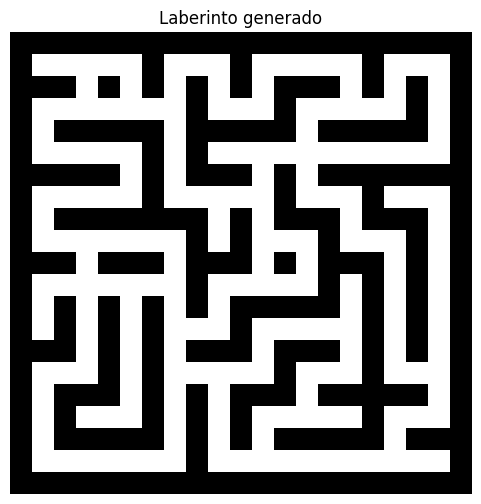

In [2]:
import copy
from noise import pnoise2
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import deque

np.random.seed(42)
random.seed(42)

def generar_laberinto_conectado(filas, columnas):
    # Asegurar que filas y columnas sean impares para el algoritmo
    if filas % 2 == 0:
        filas += 1
    if columnas % 2 == 0:
        columnas += 1
        
    # Inicializar laberinto con todas las paredes
    laberinto = [['1' for _ in range(columnas)] for _ in range(filas)]
    visitado = [[False for _ in range(columnas)] for _ in range(filas)]
    
    def vecinos(x, y):
        dirs = [(-2,0),(2,0),(0,-2),(0,2)]
        result = []
        for dx, dy in dirs:
            nx, ny = x+dx, y+dy
            if 0 <= nx < filas and 0 <= ny < columnas and not visitado[nx][ny]:
                result.append((nx, ny))
        random.shuffle(result)
        return result
    
    def dfs(x, y):
        visitado[x][y] = True
        laberinto[x][y] = '0'
        
        for nx, ny in vecinos(x, y):
            if not visitado[nx][ny]:
                # Elimina la pared entre celdas
                laberinto[(x+nx)//2][(y+ny)//2] = '0'
                dfs(nx, ny)
    
    # Comenzar desde una posición impar (esquina superior izquierda válida)
    start_x, start_y = 1, 1
    if start_x < filas and start_y < columnas:
        dfs(start_x, start_y)
    
    # Crear algunas aberturas adicionales
    for i in range(3, filas-1, 4):
        for j in range(3, columnas-1, 4):
            if random.random() < 0.3:  # 30% probabilidad de crear apertura
                if i > 0 and laberinto[i-1][j] == '1':
                    laberinto[i-1][j] = '0'
                elif j > 0 and laberinto[i][j-1] == '1':
                    laberinto[i][j-1] = '0'
    
    return laberinto

# Generar el laberinto
laberinto_conectado = generar_laberinto_conectado(20, 20)

# Convertir a array NumPy (de int en vez de string)
laberinto_np = np.array(laberinto_conectado, dtype=int)

# Imprimir en consola
print("Array NumPy del laberinto:\n", laberinto_np)

# Visualizar con matplotlib
plt.figure(figsize=(6,6))
plt.imshow(laberinto_np, cmap="binary")
plt.title("Laberinto generado")
plt.axis("off")
plt.show()

# Muestra parcialmente la ruta tomada.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import deque

def resolver_laberinto_iterativo(laberinto, inicio, fin):
    filas, columnas = laberinto.shape
    visitado = np.zeros_like(laberinto, dtype=bool)
    padre = dict()

    # Movimientos posibles (arriba, abajo, izquierda, derecha)
    movimientos = [(-1,0),(1,0),(0,-1),(0,1)]
    
    cola = deque([inicio])
    visitado[inicio] = True
    
    while cola:
        actual = cola.popleft()

        # Dibujar paso a paso
        plt.imshow(laberinto, cmap="binary")
        plt.title("Buscando ruta en el laberinto...")
        # Pintar nodos visitados en gris
        visitados_y, visitados_x = np.where(visitado)
        plt.scatter(visitados_x, visitados_y, c="grey", s=10)
        # Pintar inicio y fin
        plt.scatter(inicio[1], inicio[0], c="green", s=50, label="Inicio")
        plt.scatter(fin[1], fin[0], c="red", s=50, label="Meta")
        plt.pause(0.1)  # Pausa para animación
        plt.clf()

        if actual == fin:
            break

        for dx, dy in movimientos:
            nx, ny = actual[0] + dx, actual[1] + dy
            if 0 <= nx < filas and 0 <= ny < columnas:
                if laberinto[nx, ny] == 0 and not visitado[nx, ny]:
                    cola.append((nx, ny))
                    visitado[nx, ny] = True
                    padre[(nx, ny)] = actual
    
    # Reconstruir ruta
    ruta = []
    nodo = fin
    while nodo != inicio:
        ruta.append(nodo)
        nodo = padre.get(nodo)
        if nodo is None:
            return []  # no hay solución
    ruta.append(inicio)
    ruta.reverse()
    return ruta


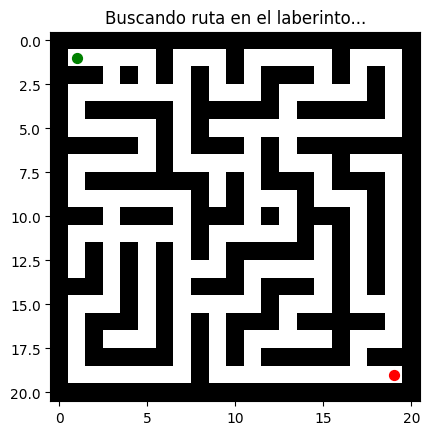

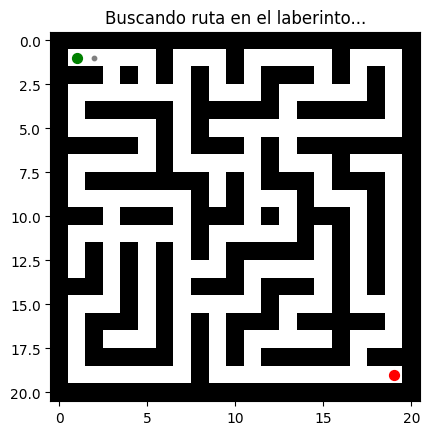

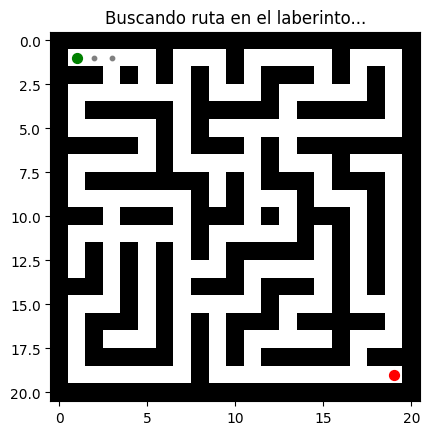

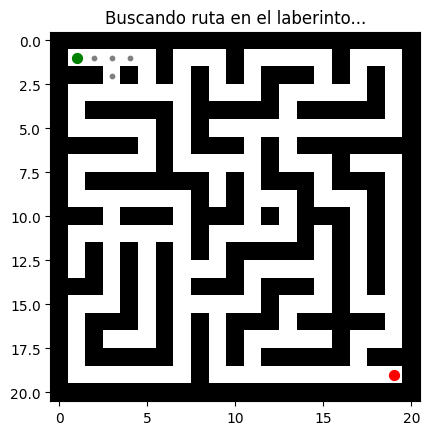

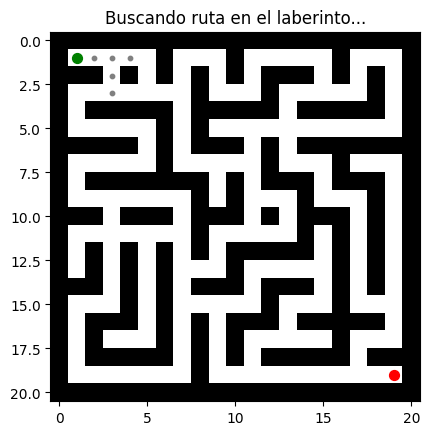

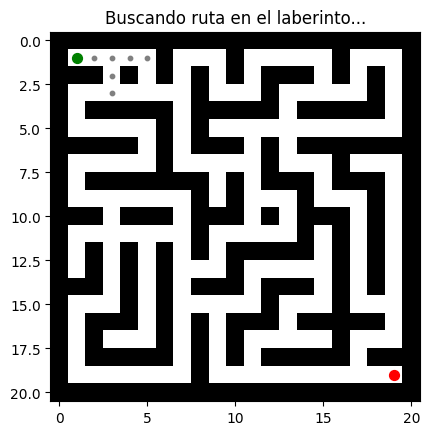

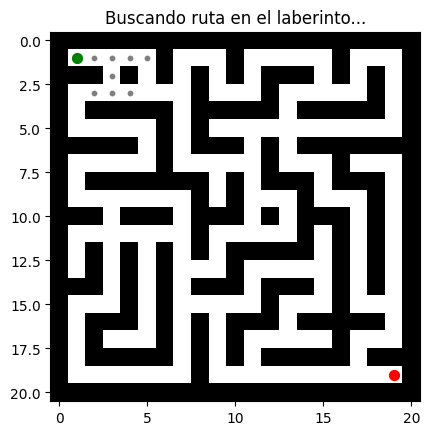

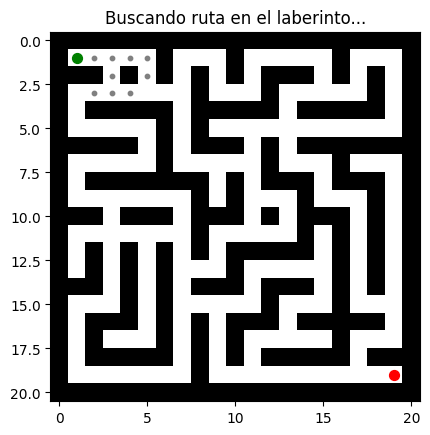

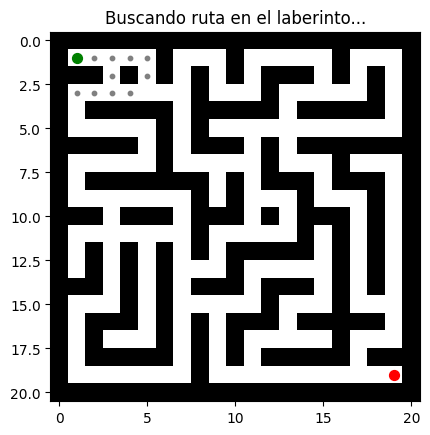

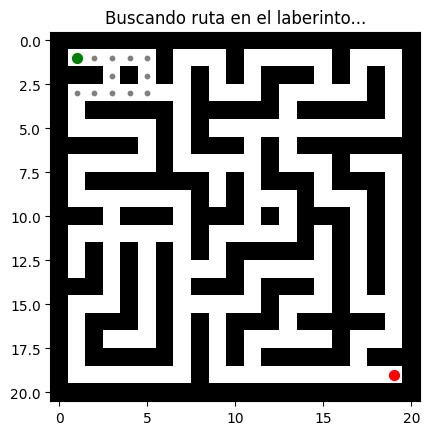

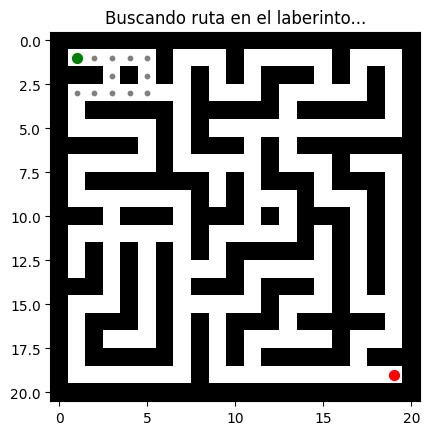

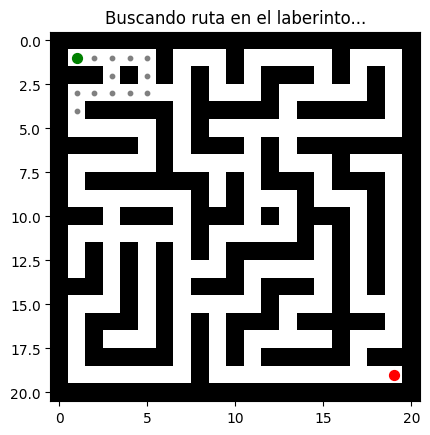

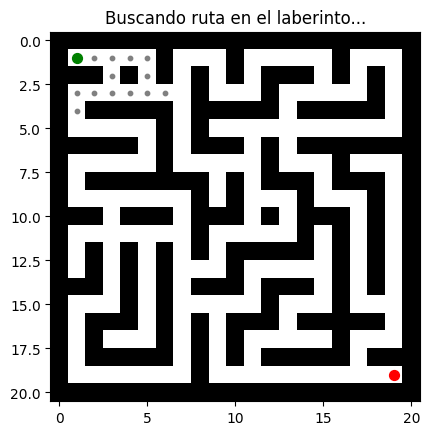

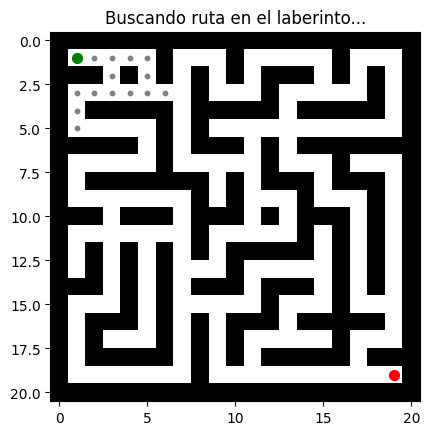

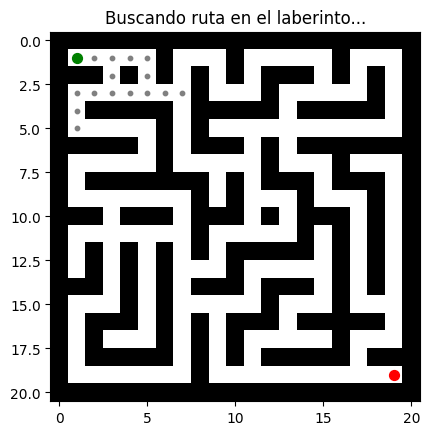

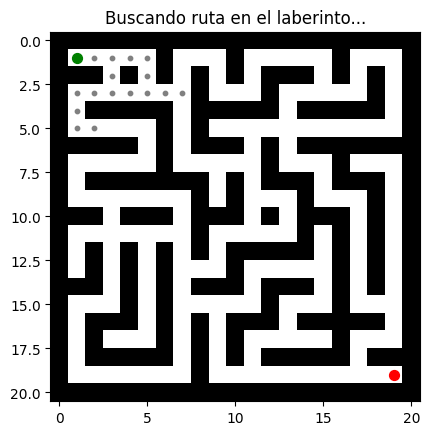

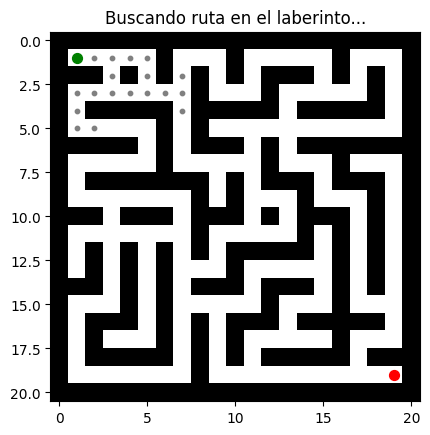

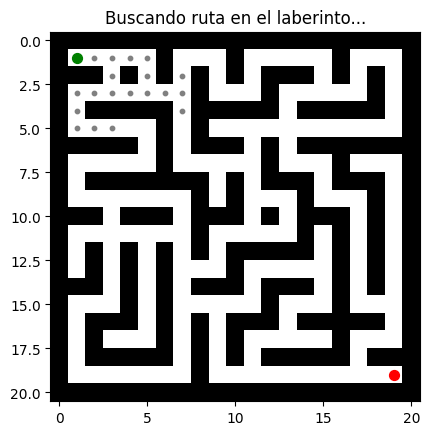

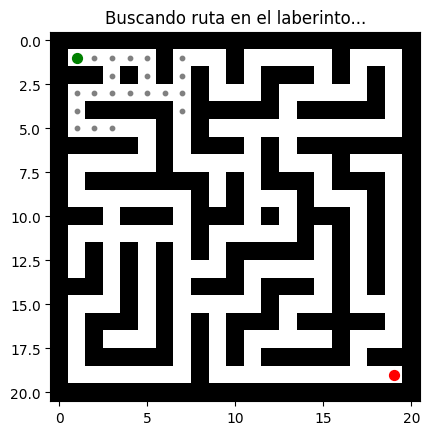

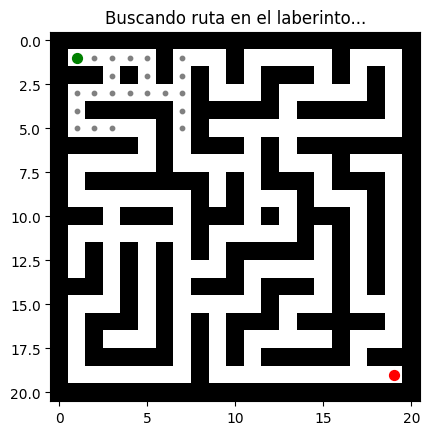

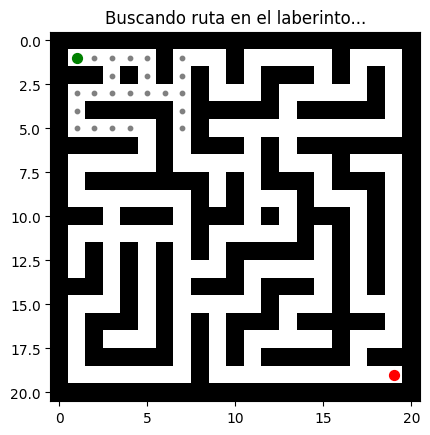

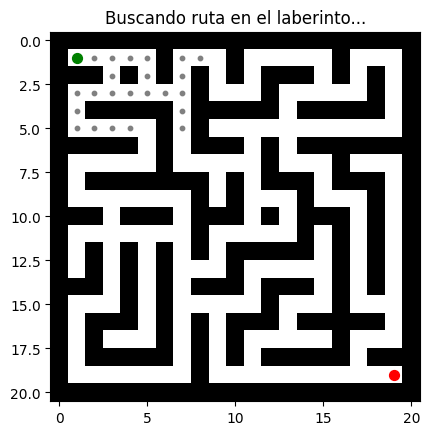

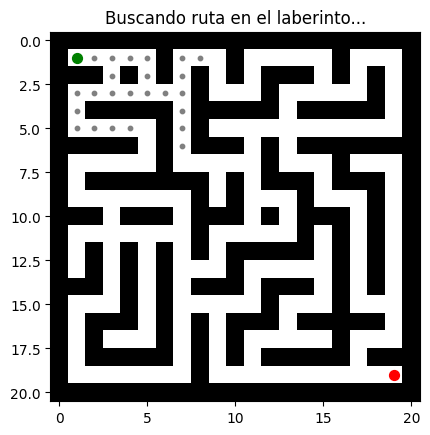

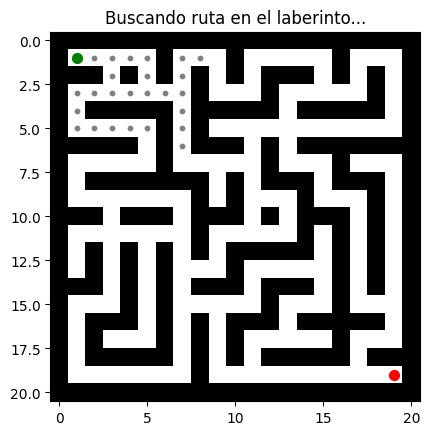

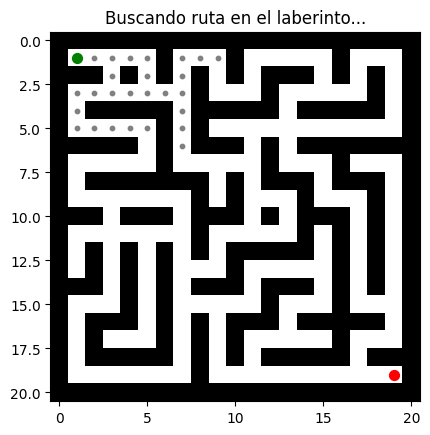

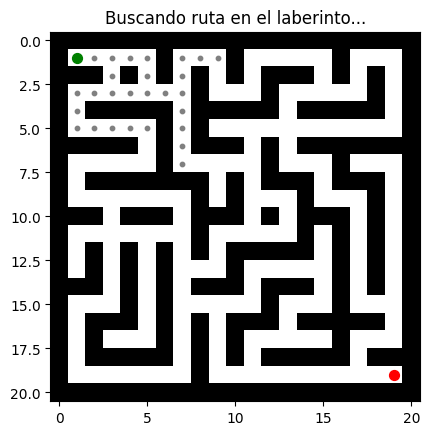

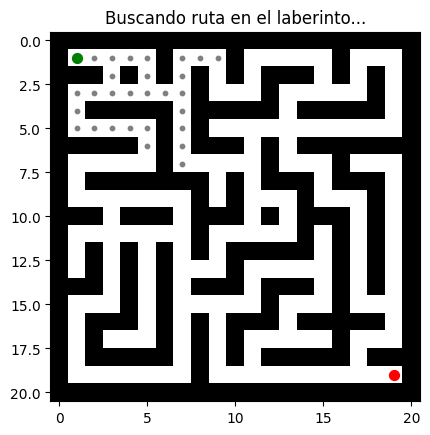

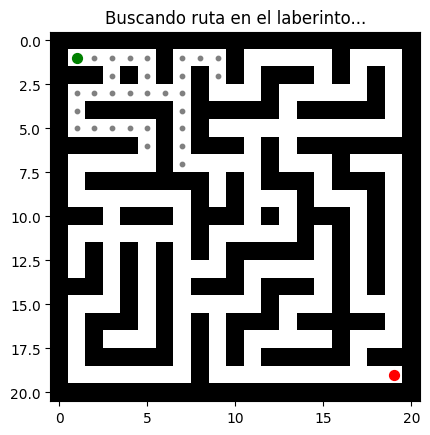

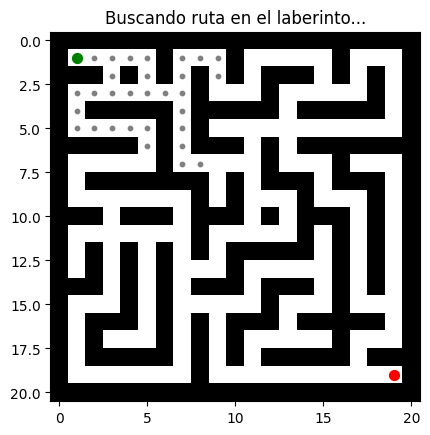

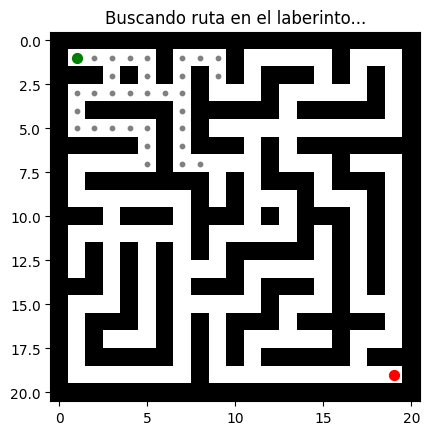

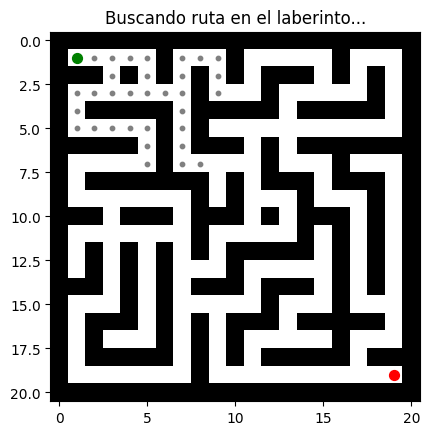

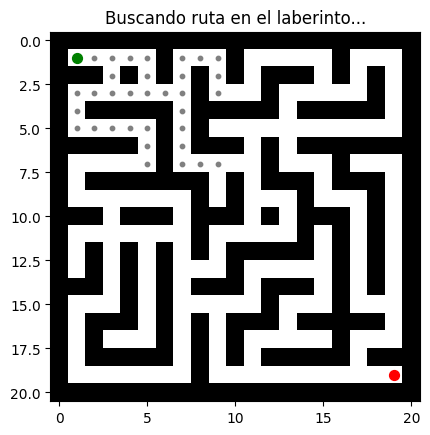

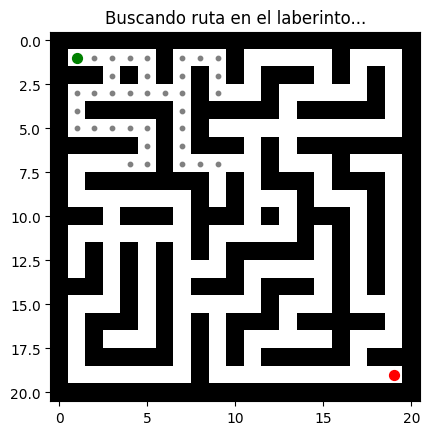

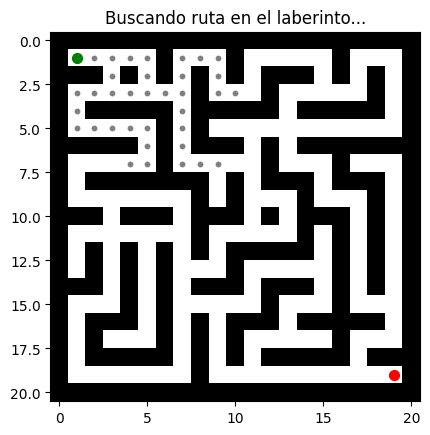

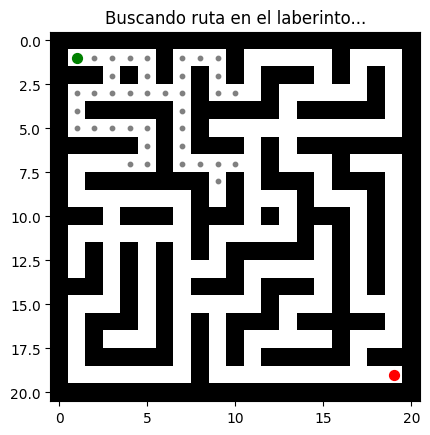

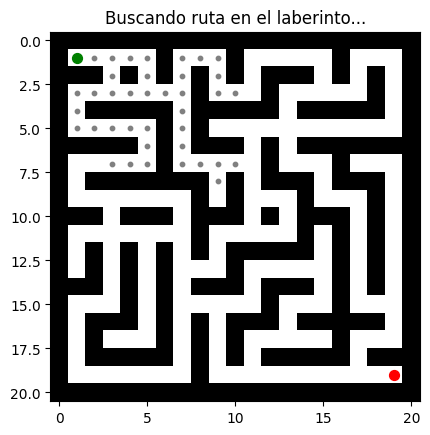

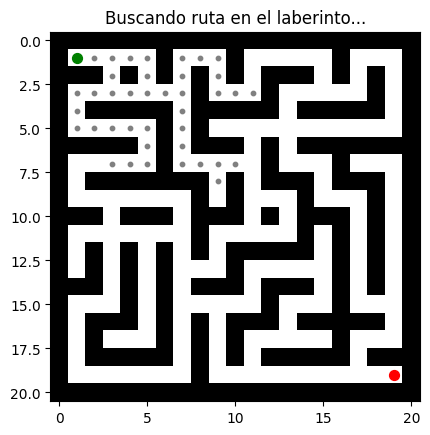

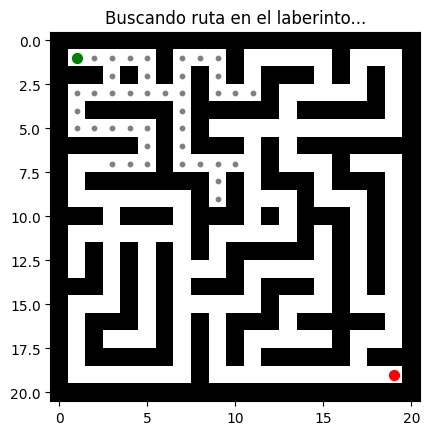

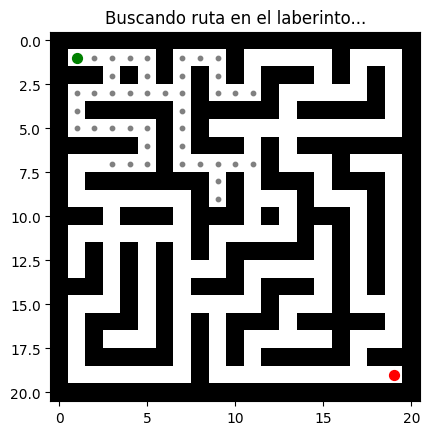

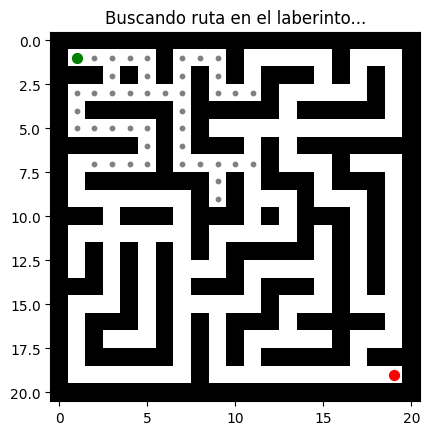

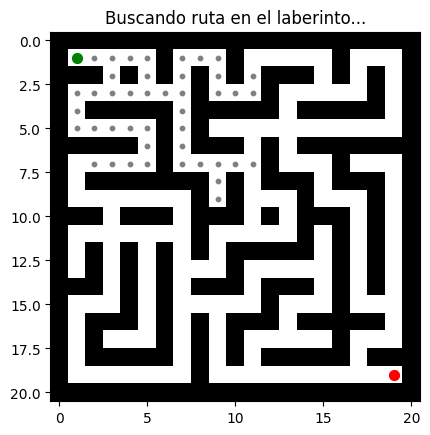

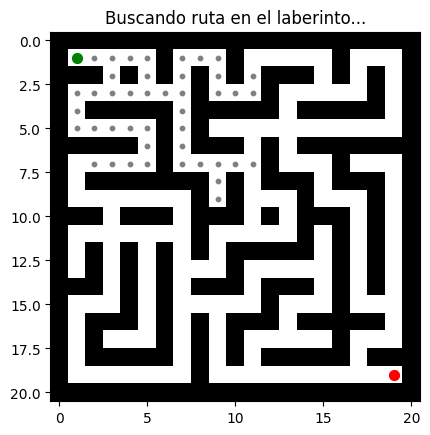

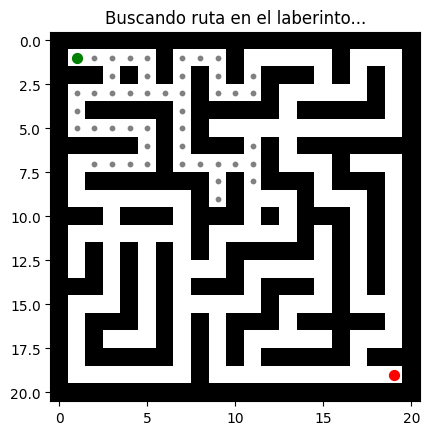

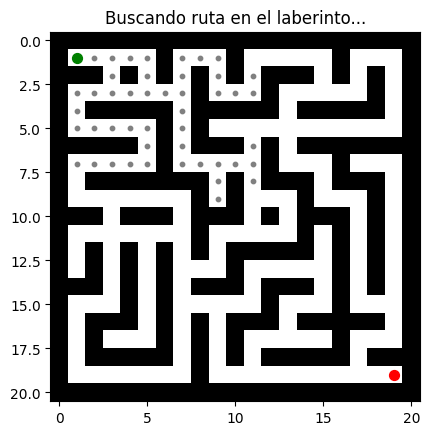

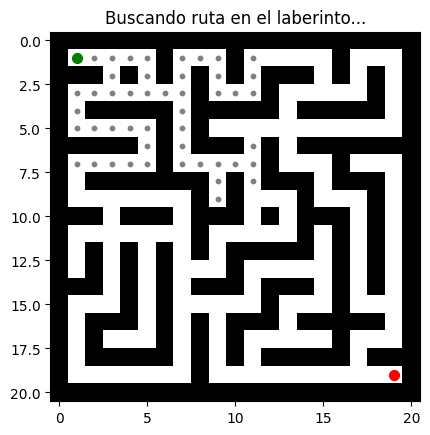

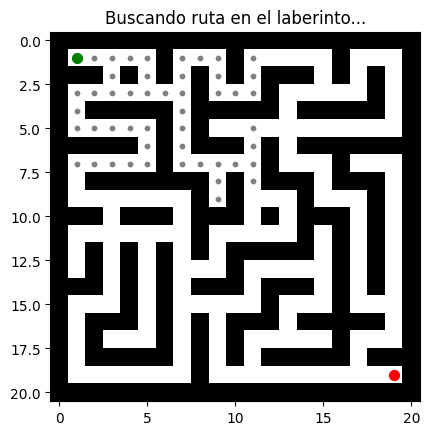

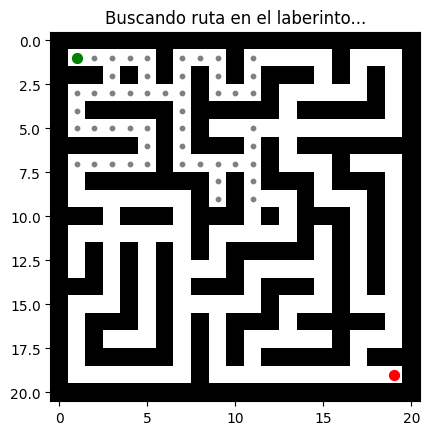

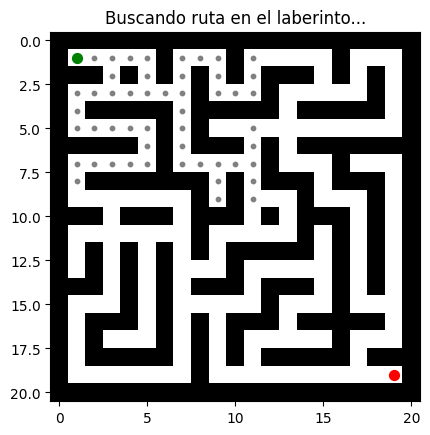

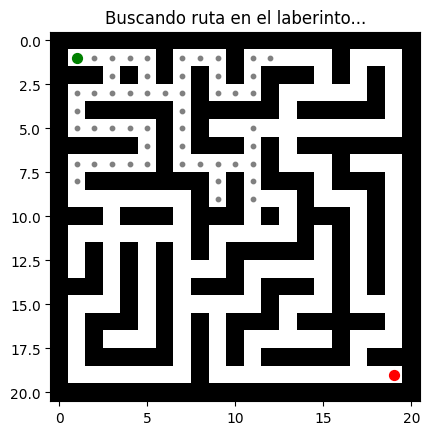

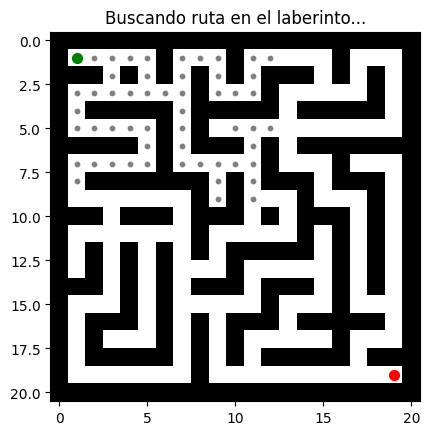

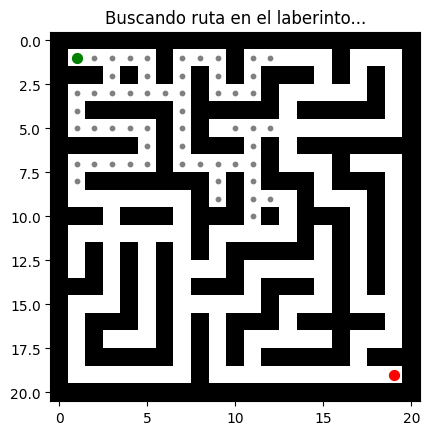

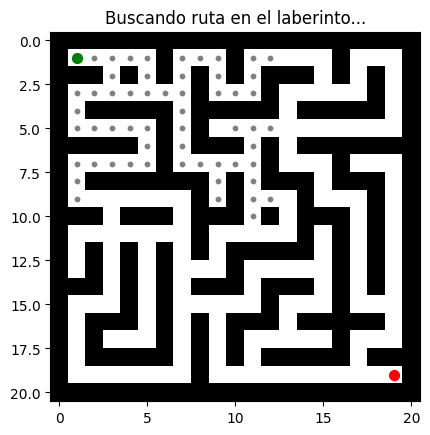

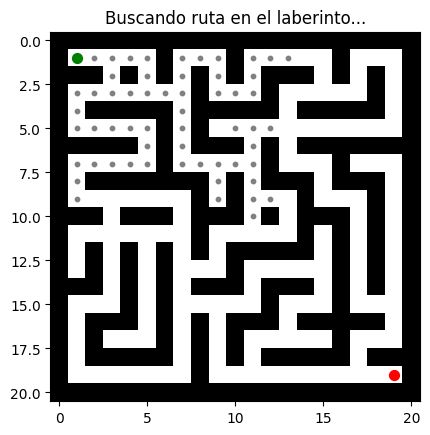

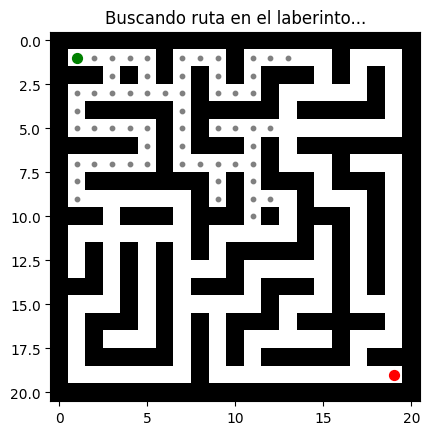

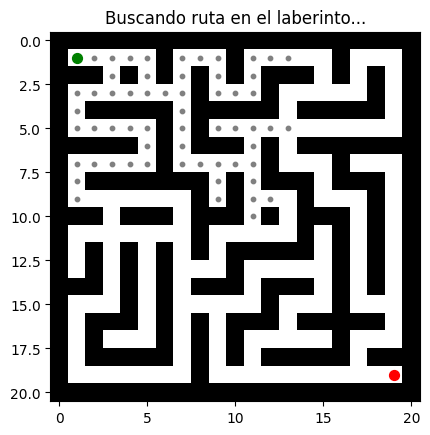

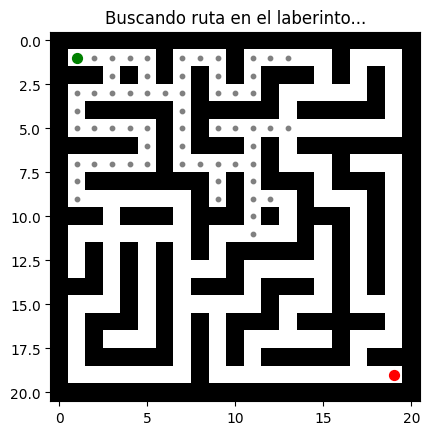

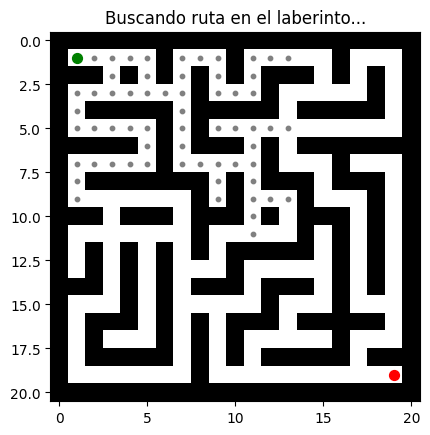

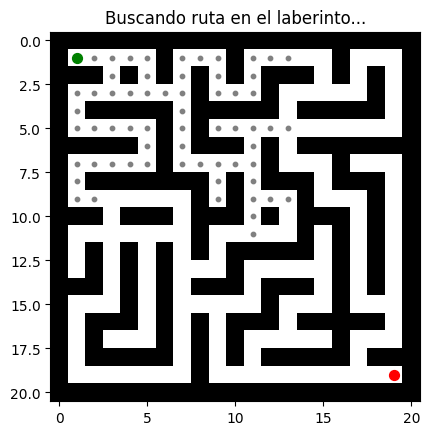

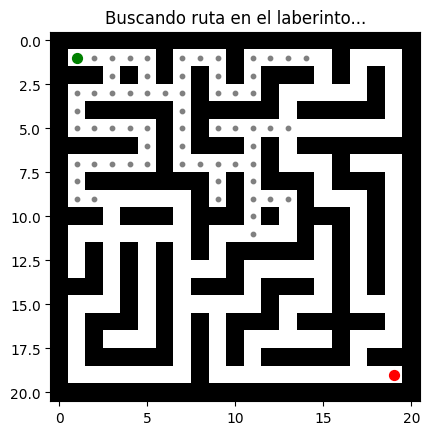

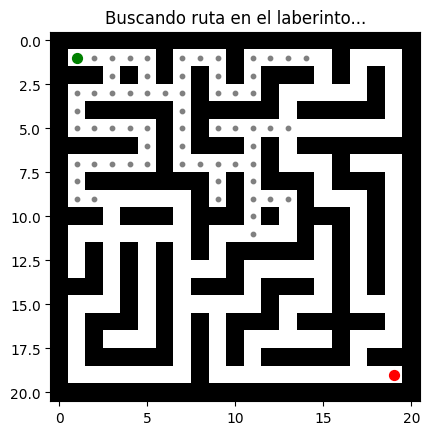

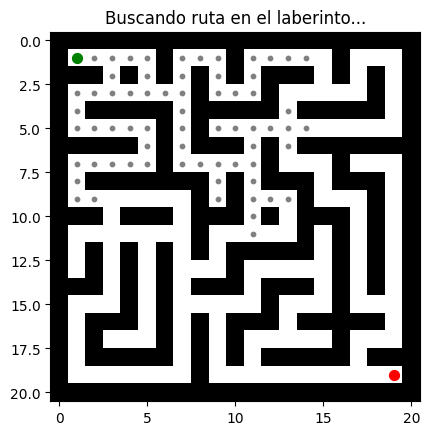

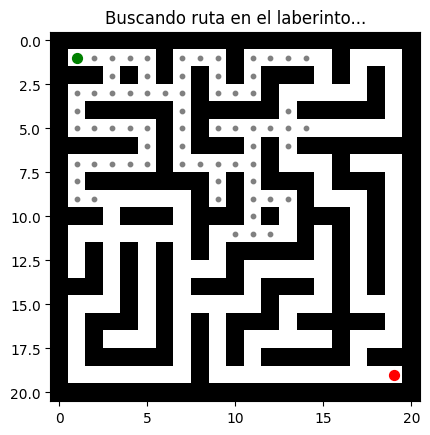

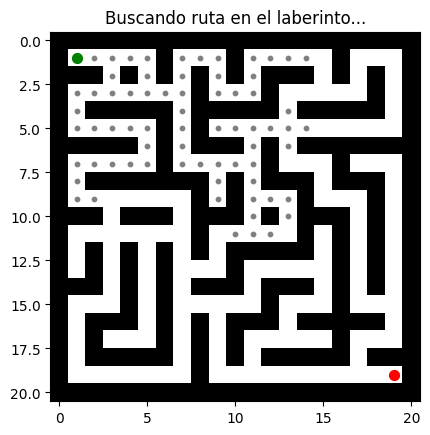

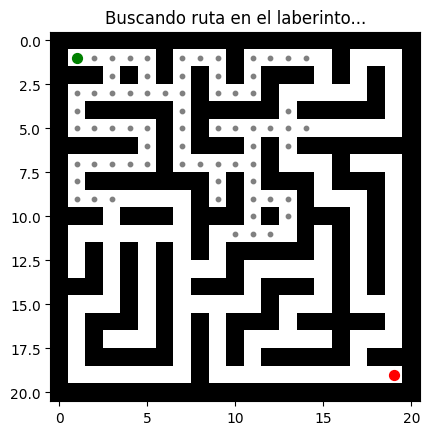

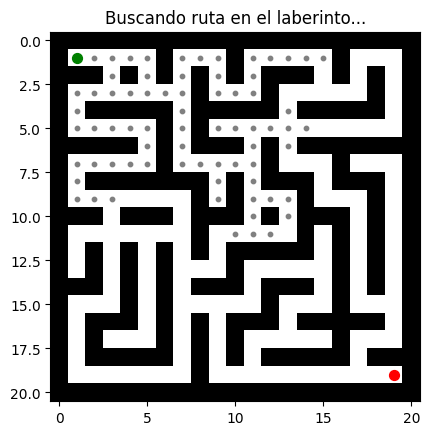

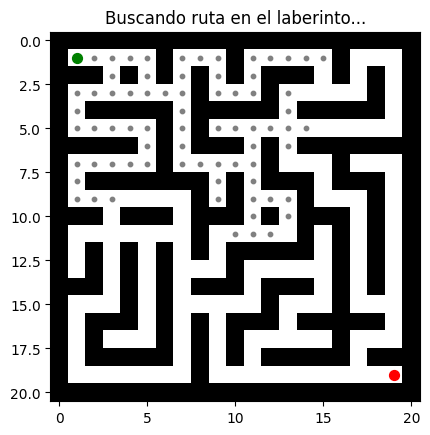

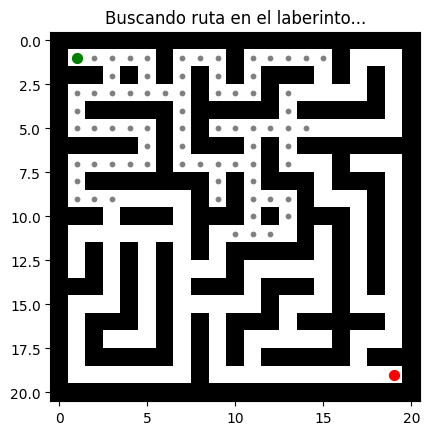

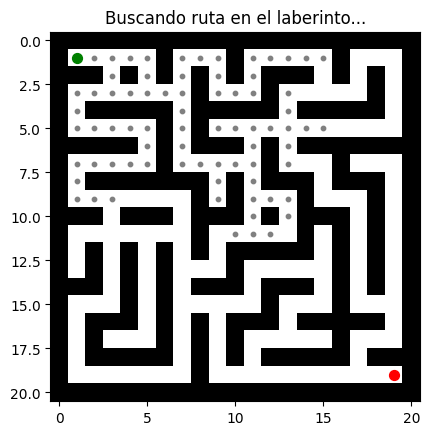

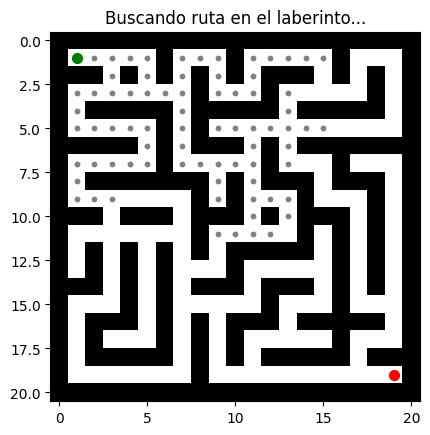

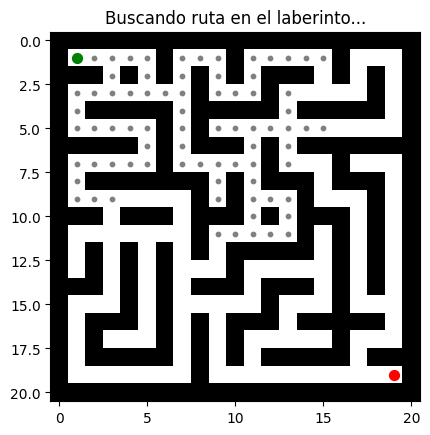

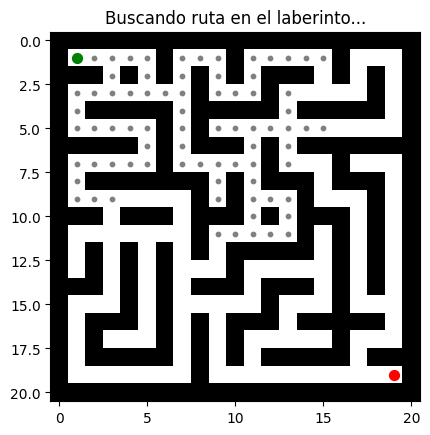

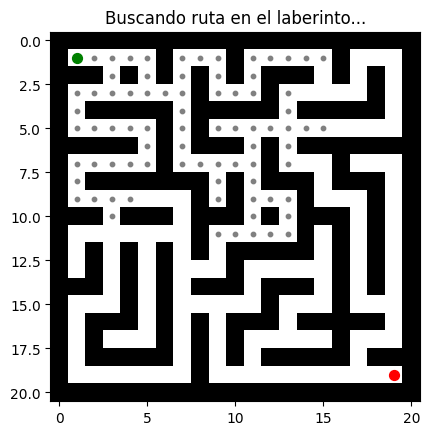

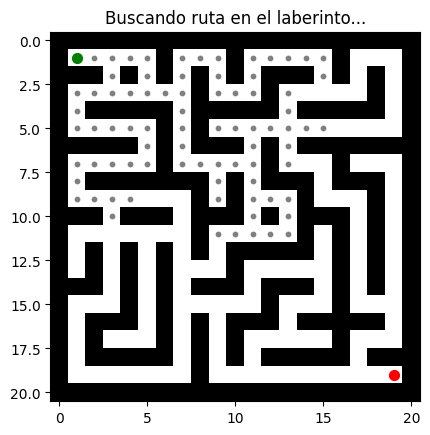

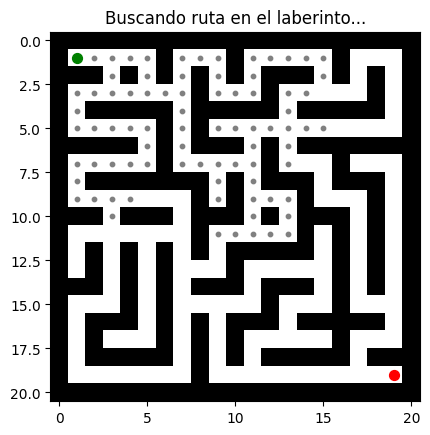

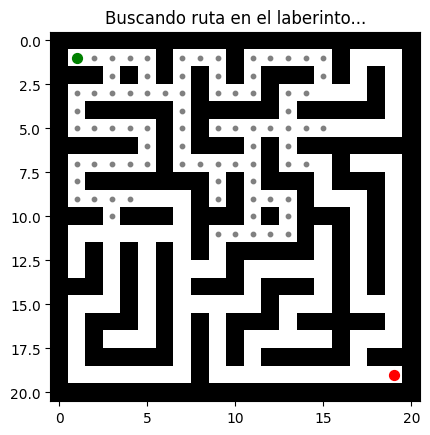

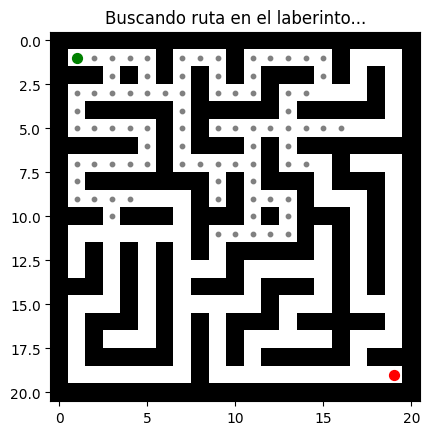

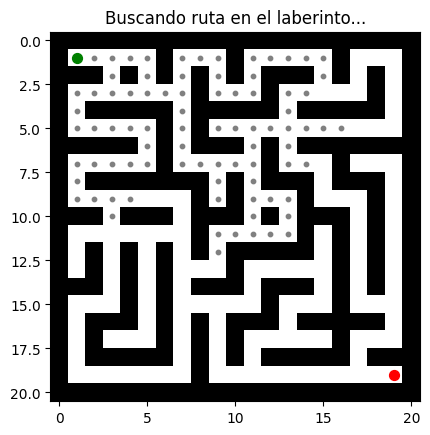

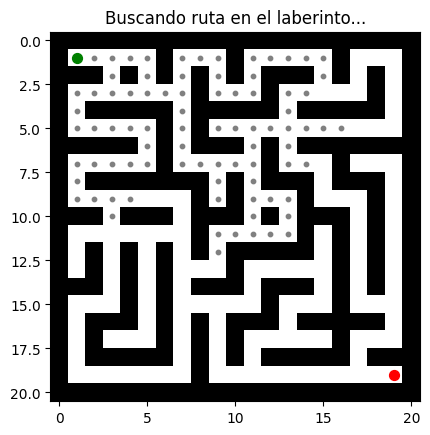

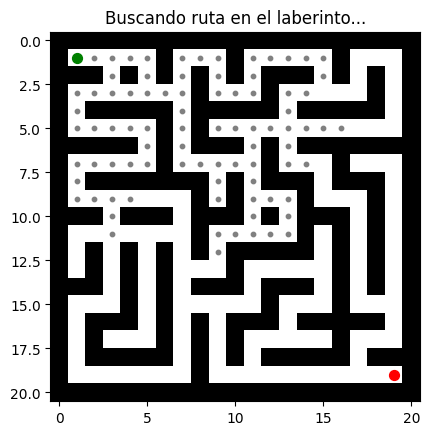

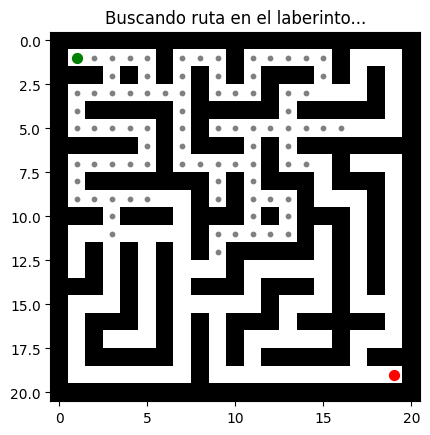

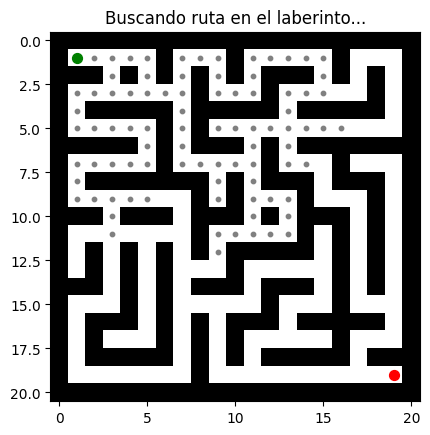

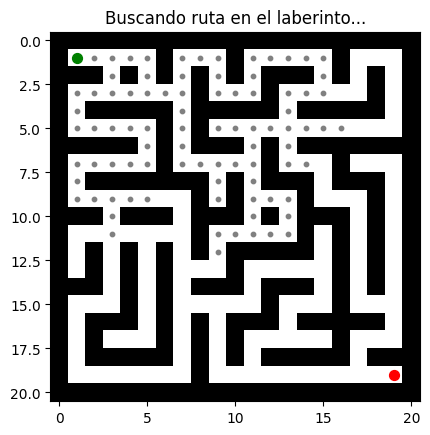

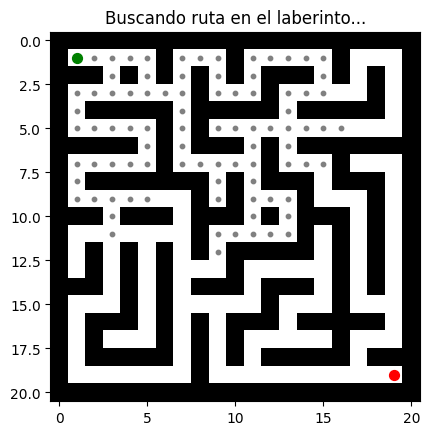

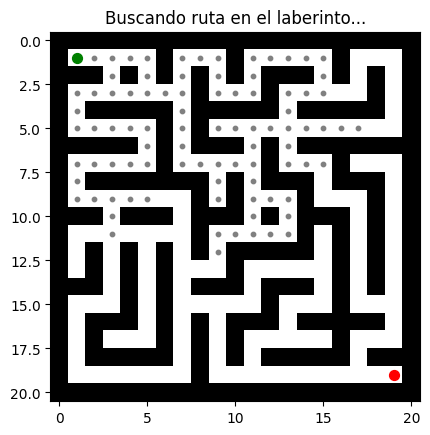

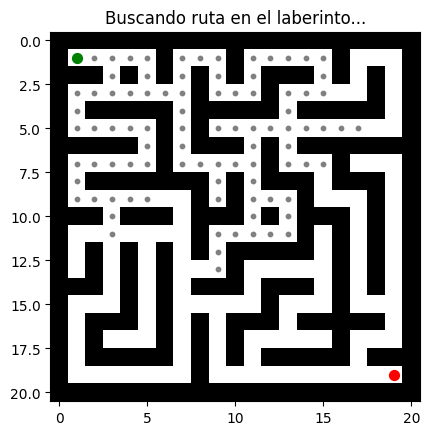

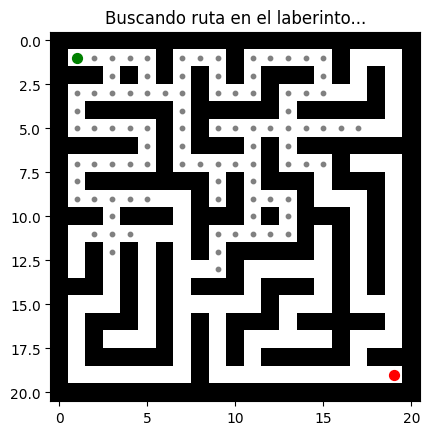

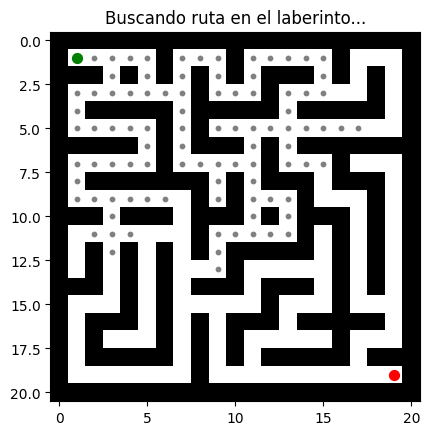

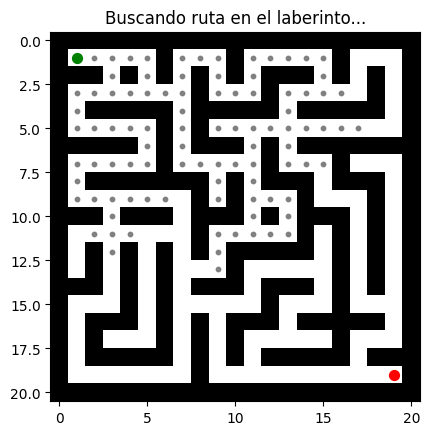

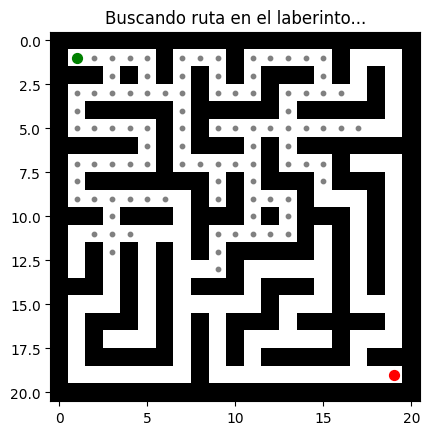

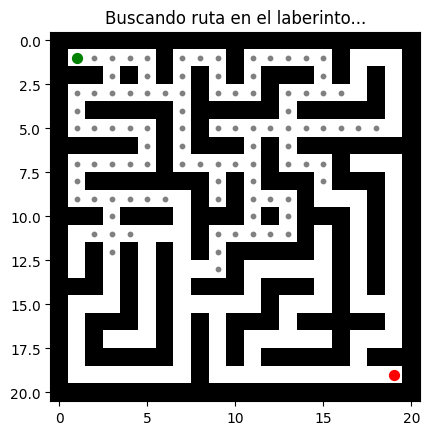

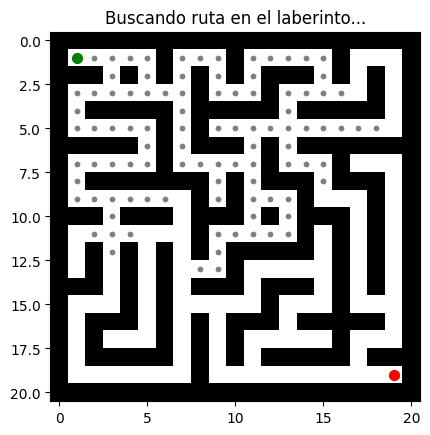

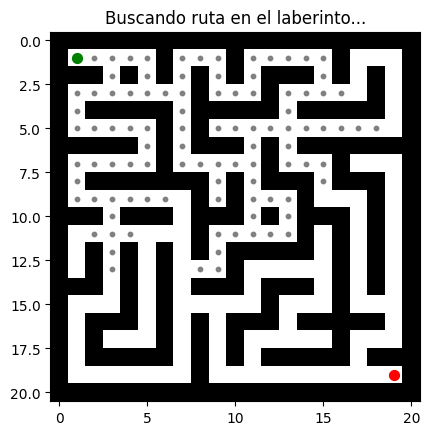

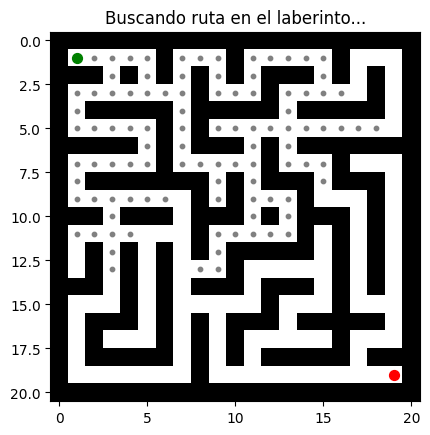

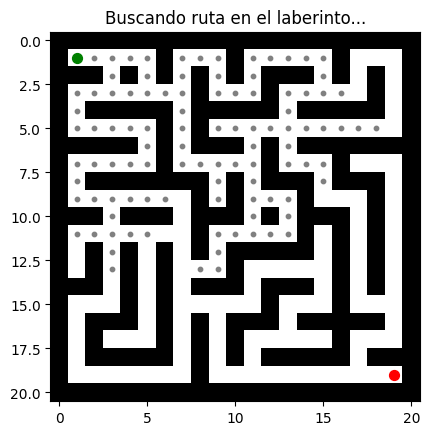

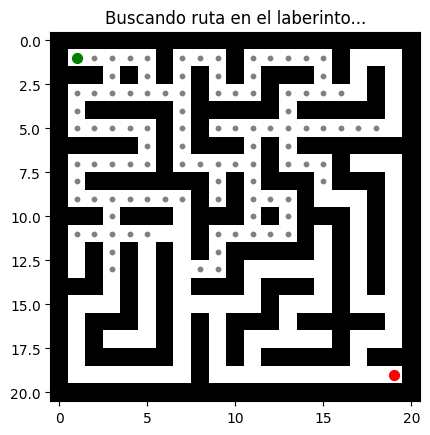

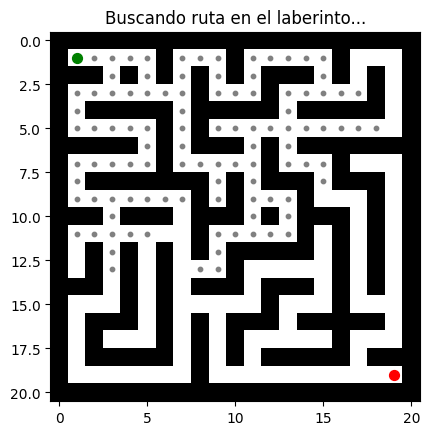

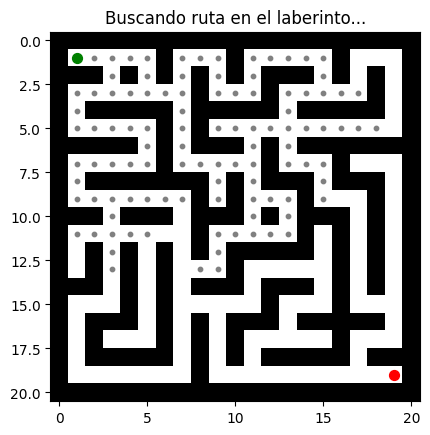

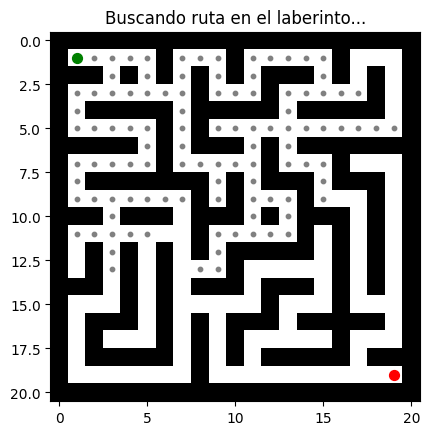

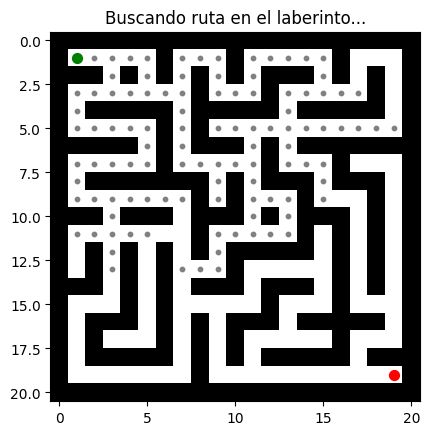

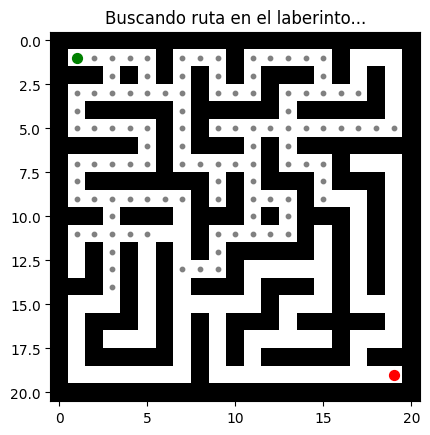

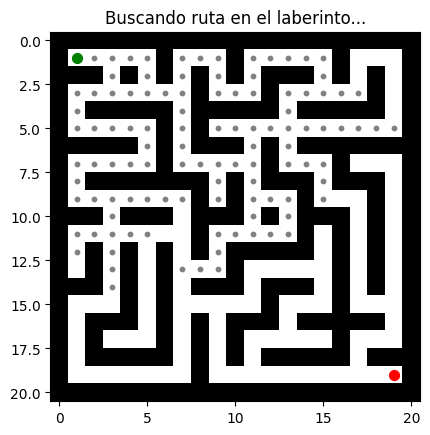

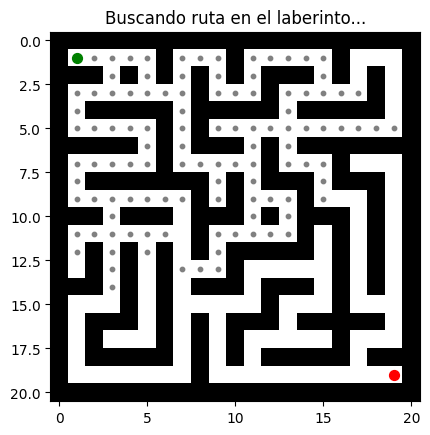

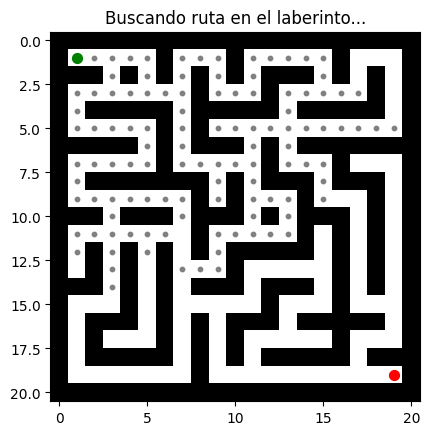

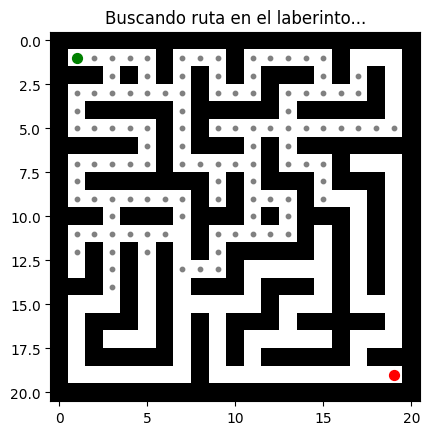

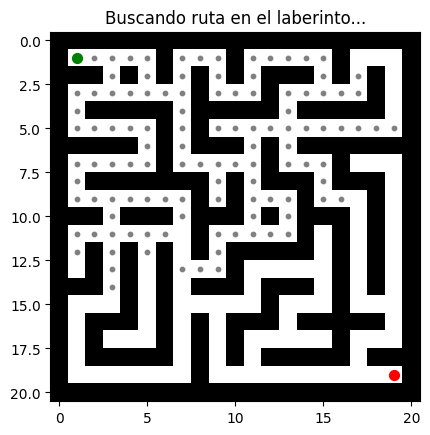

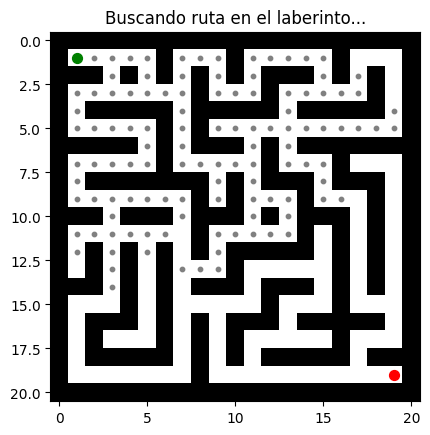

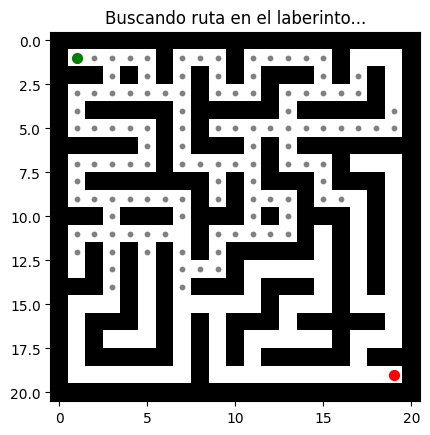

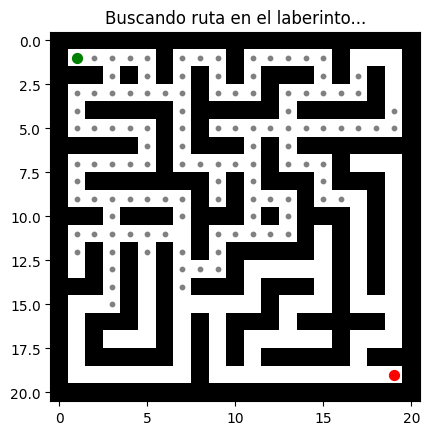

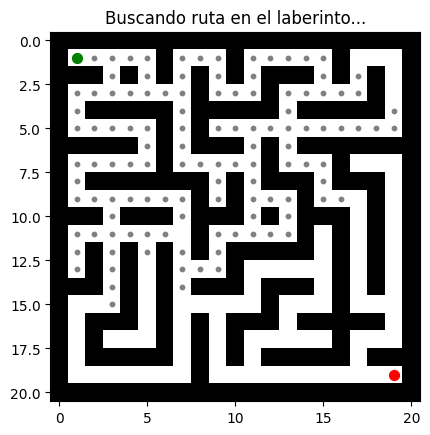

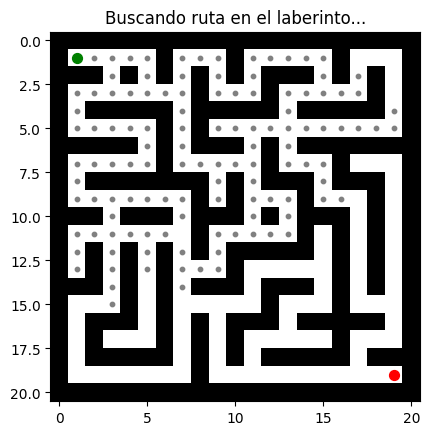

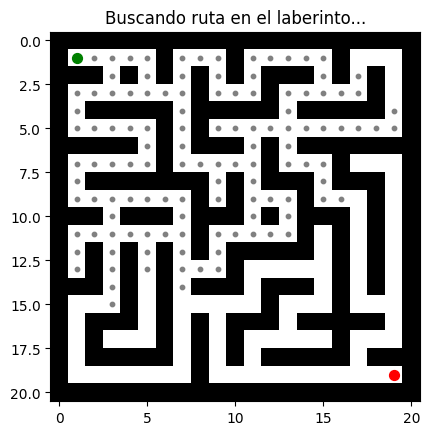

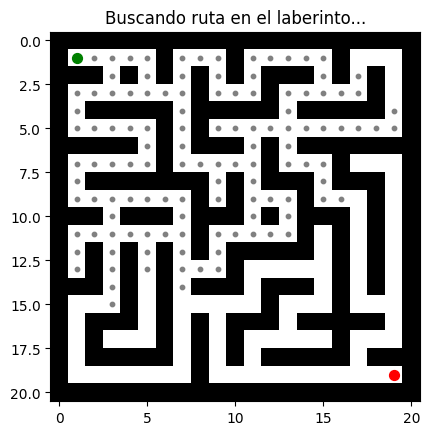

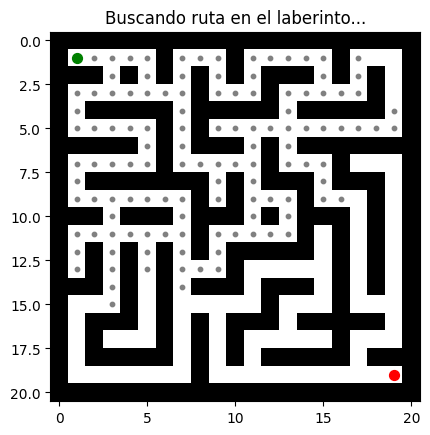

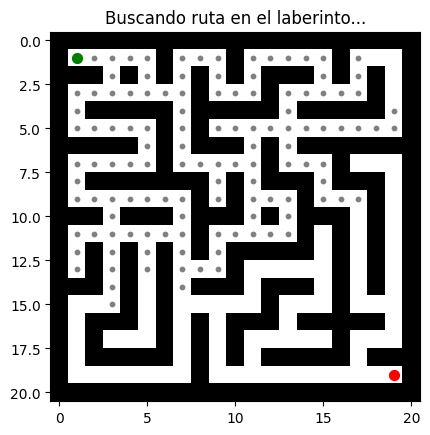

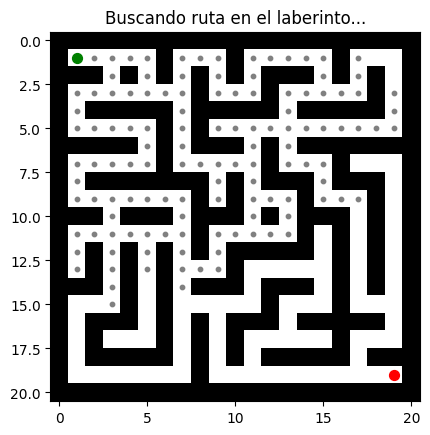

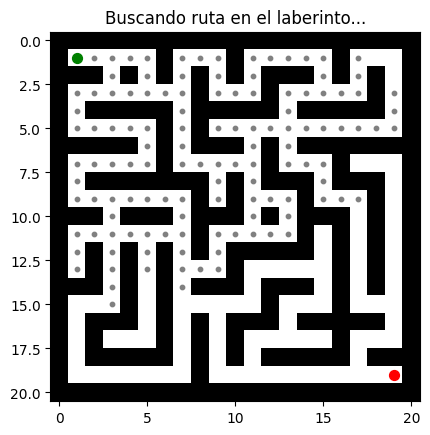

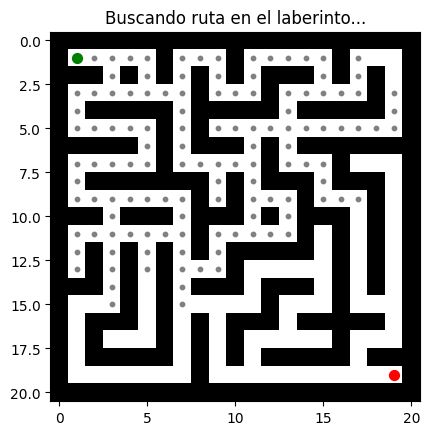

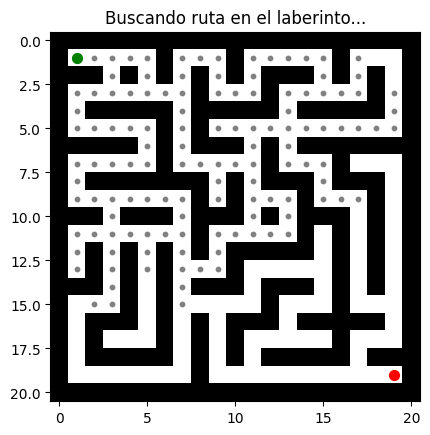

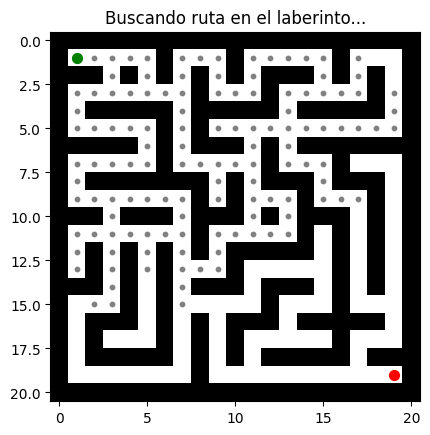

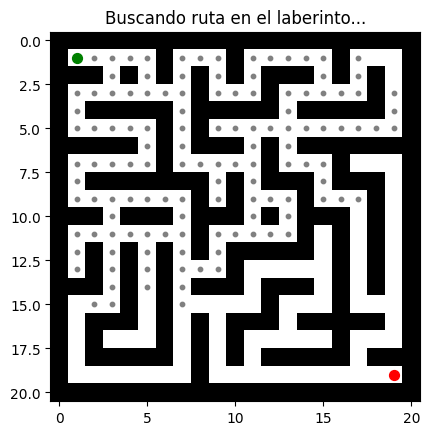

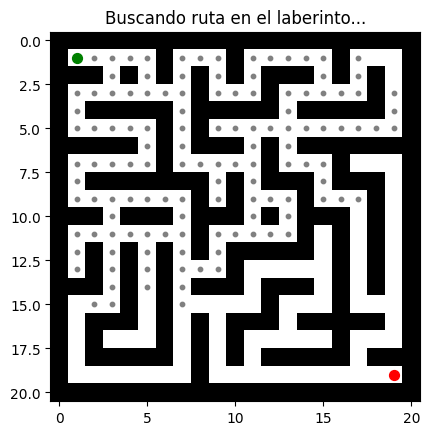

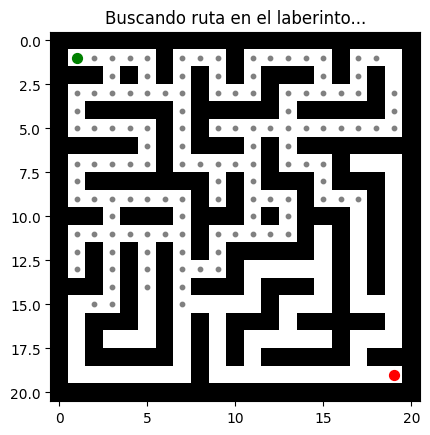

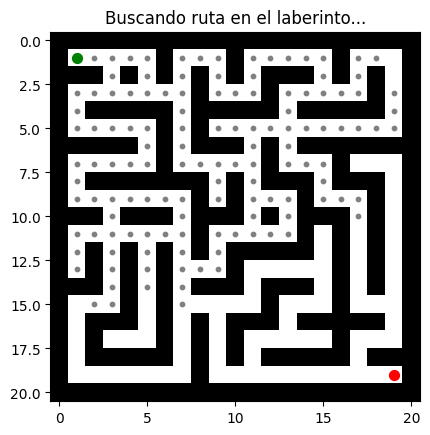

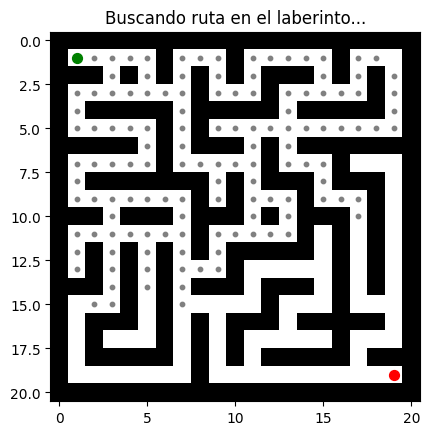

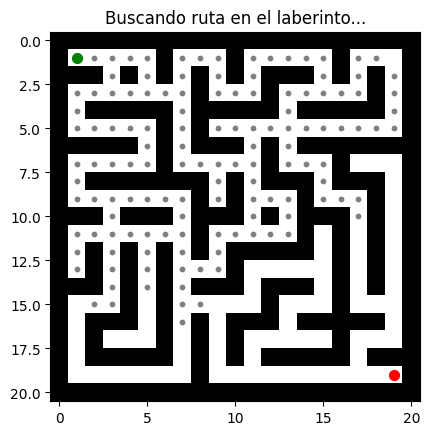

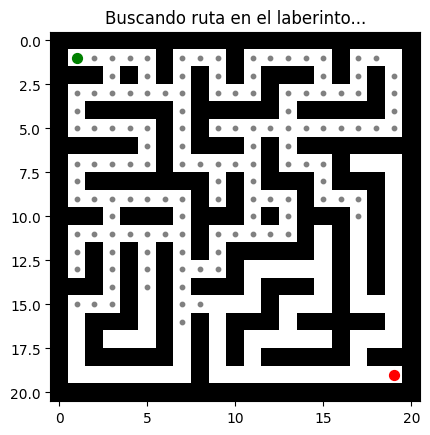

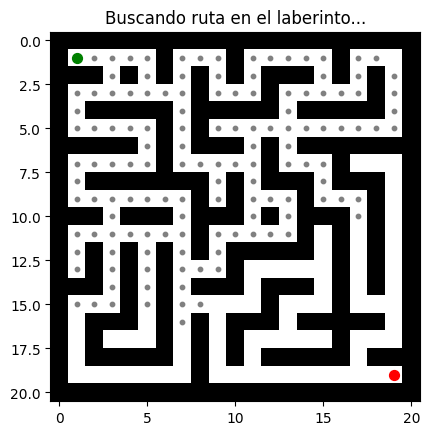

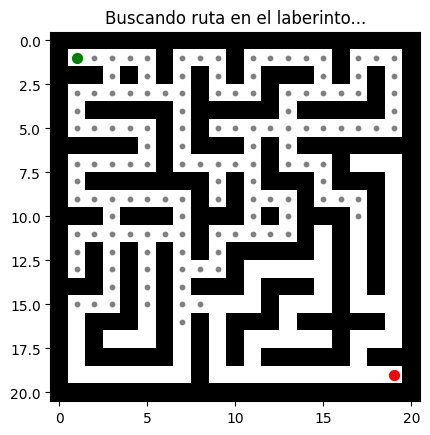

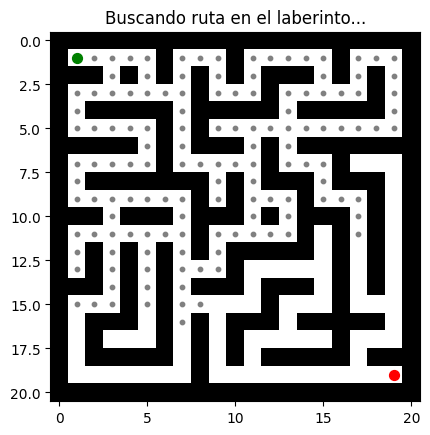

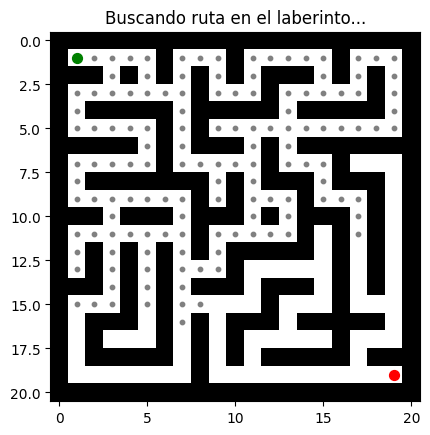

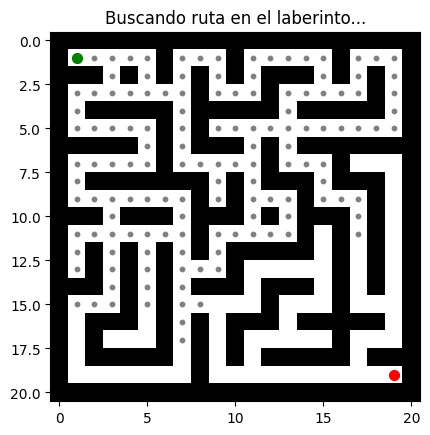

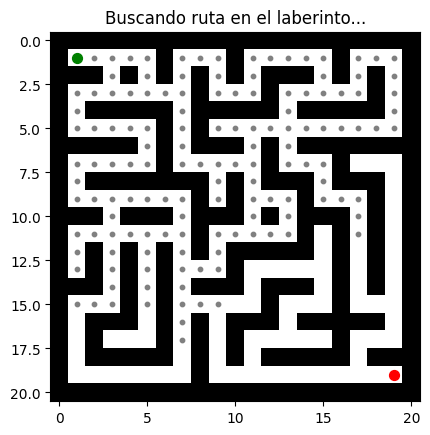

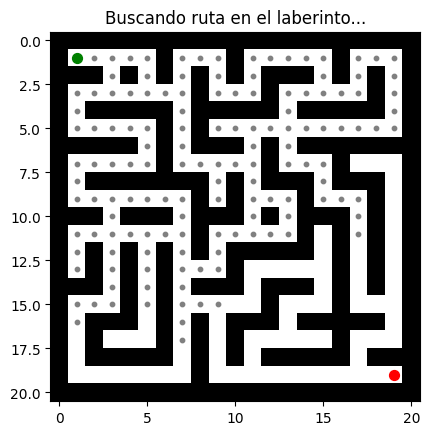

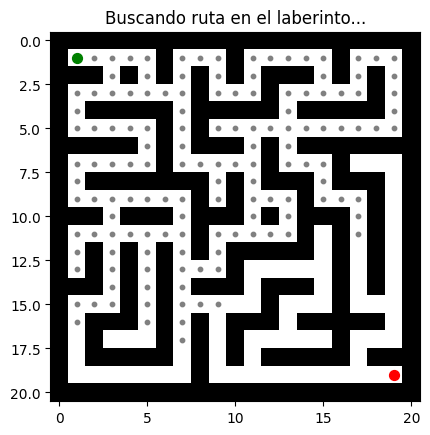

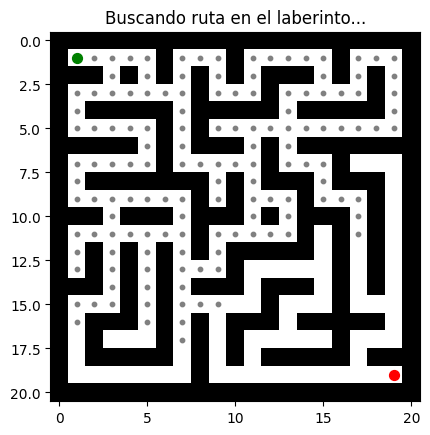

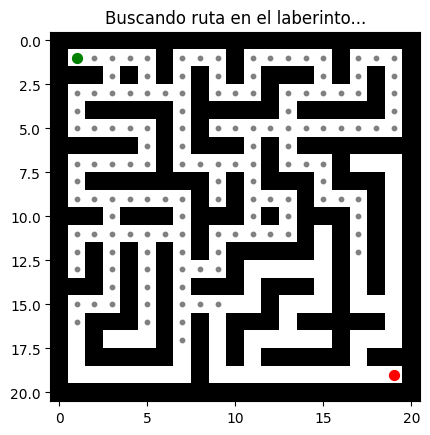

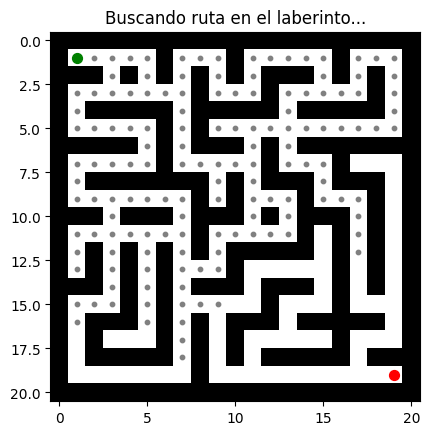

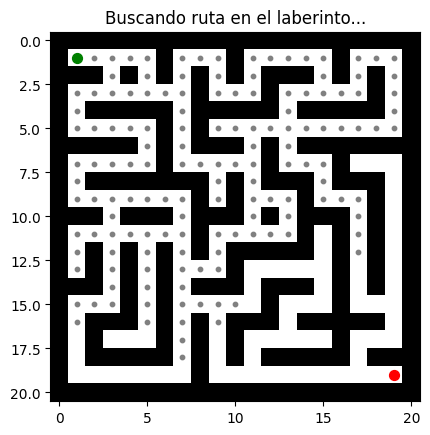

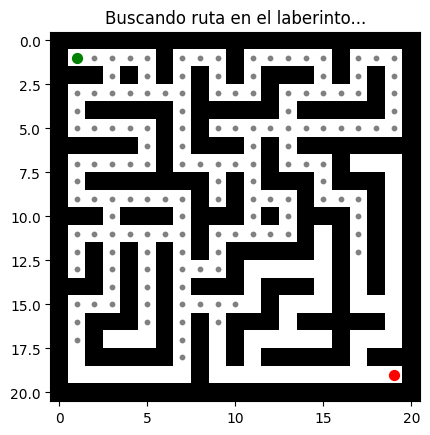

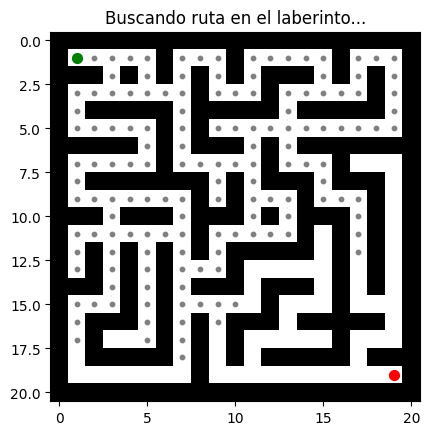

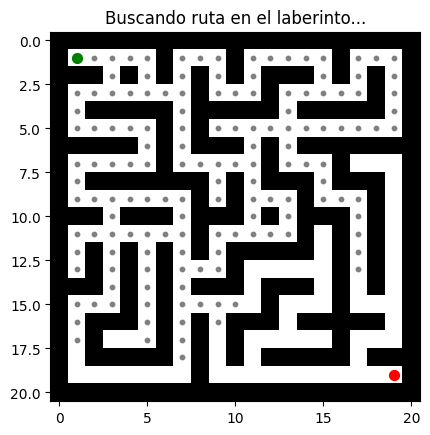

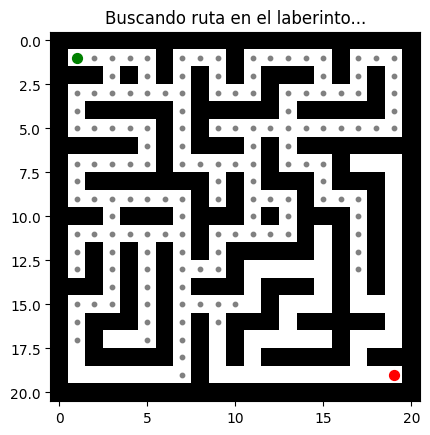

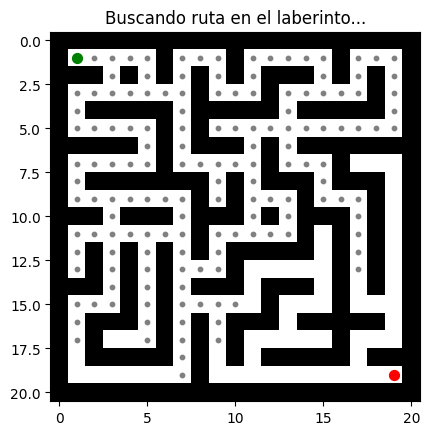

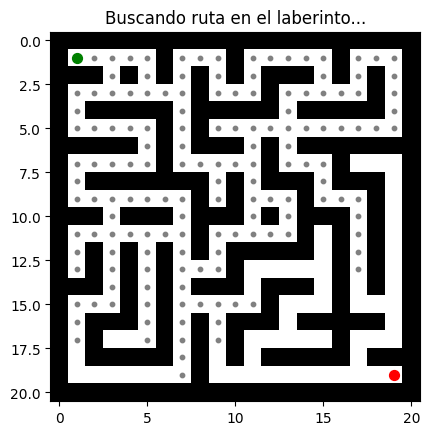

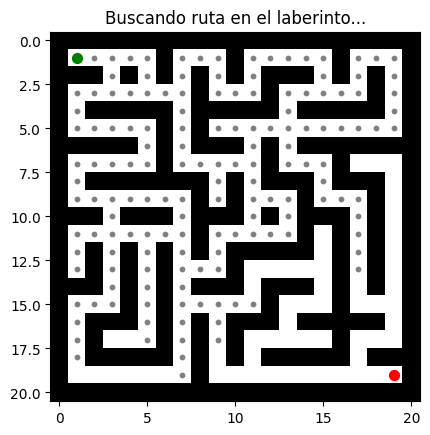

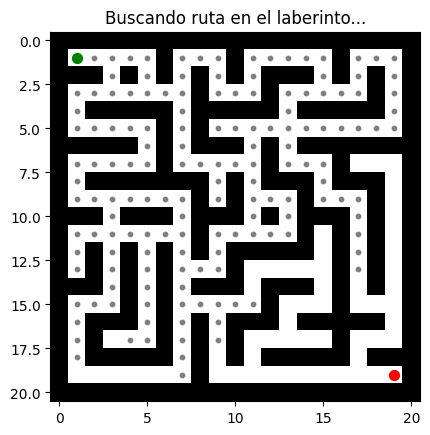

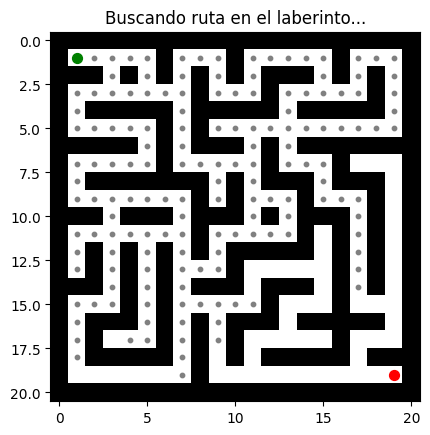

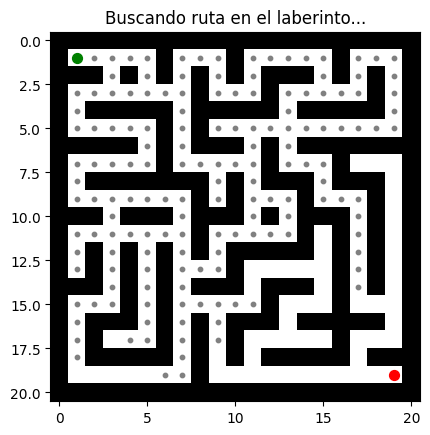

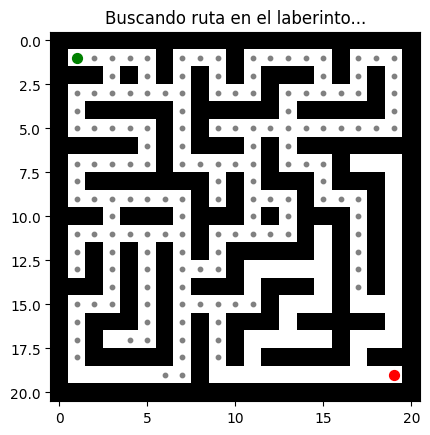

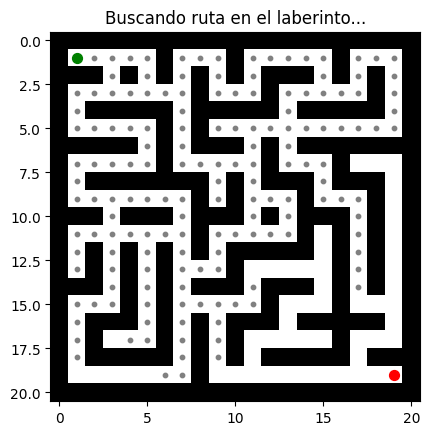

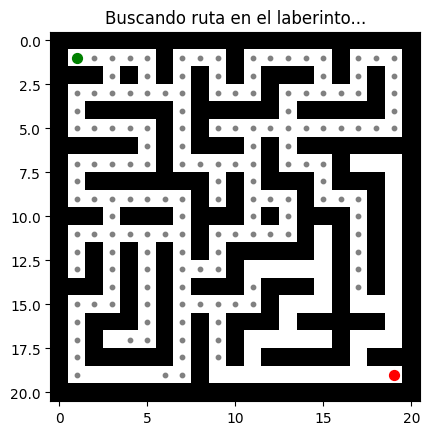

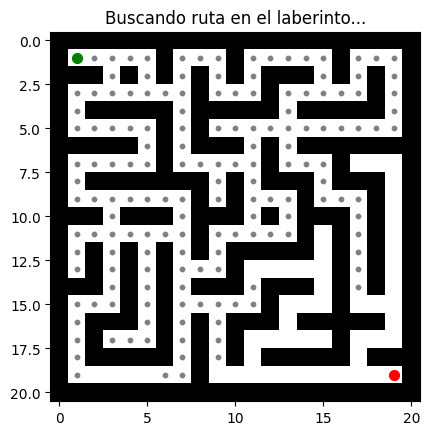

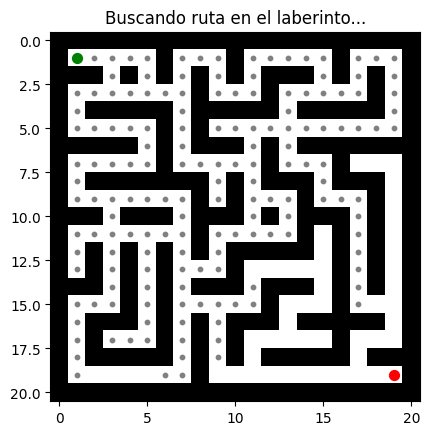

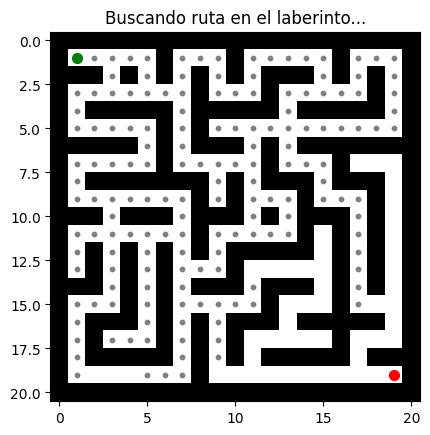

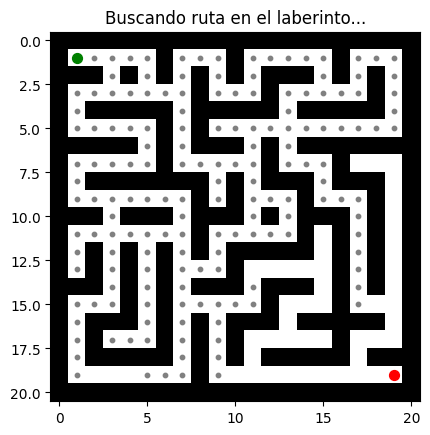

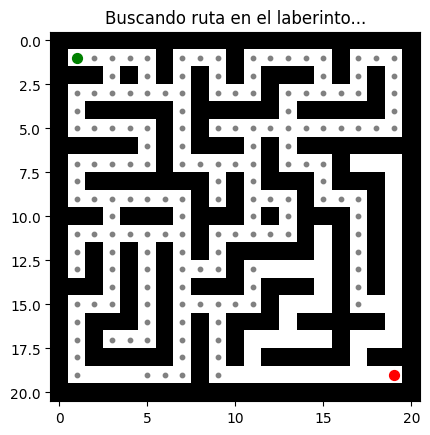

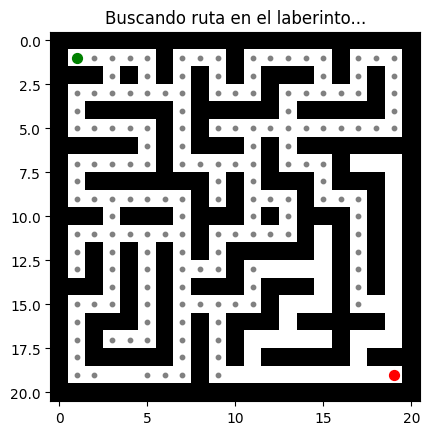

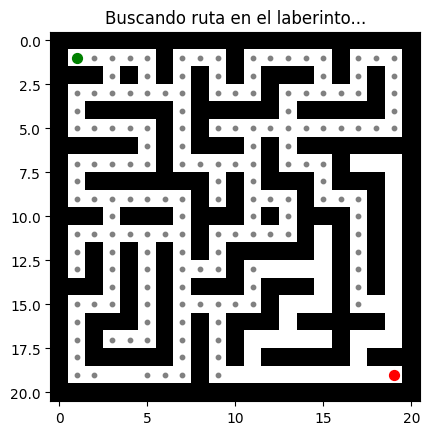

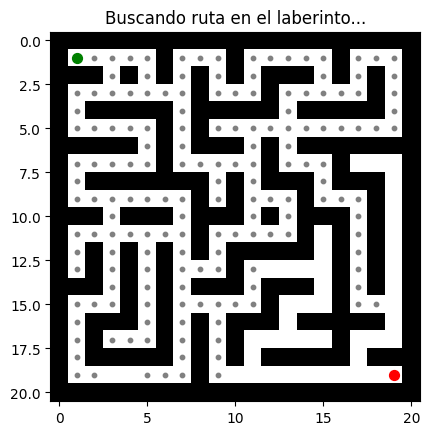

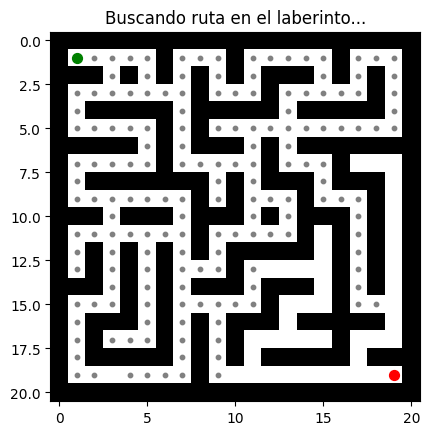

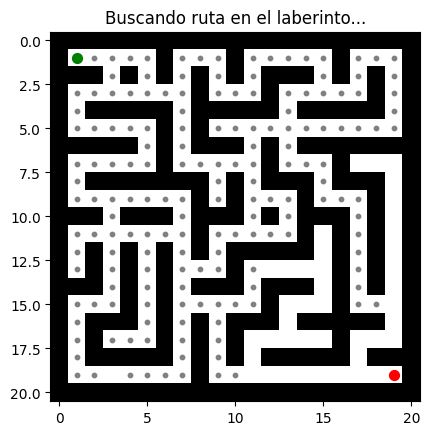

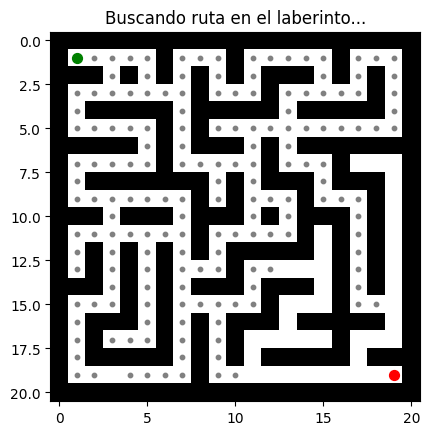

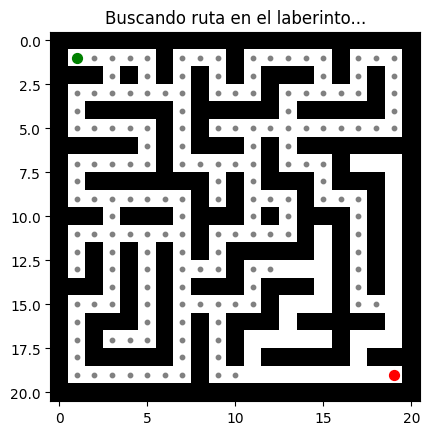

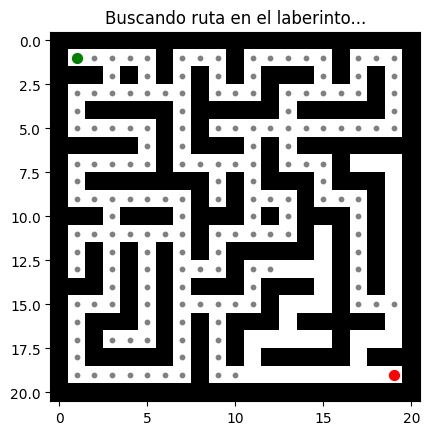

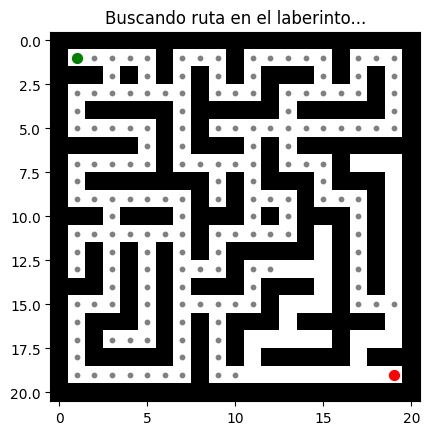

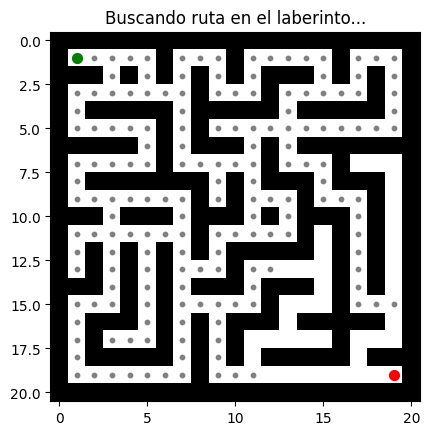

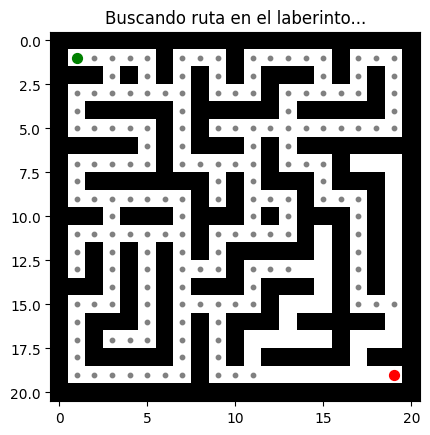

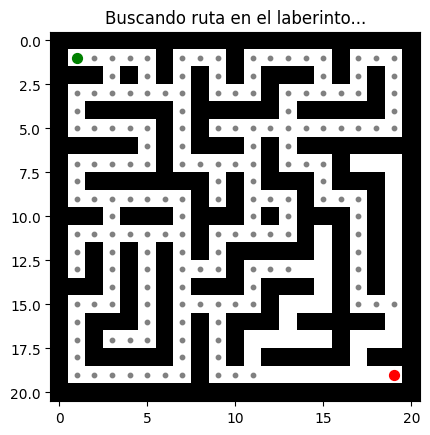

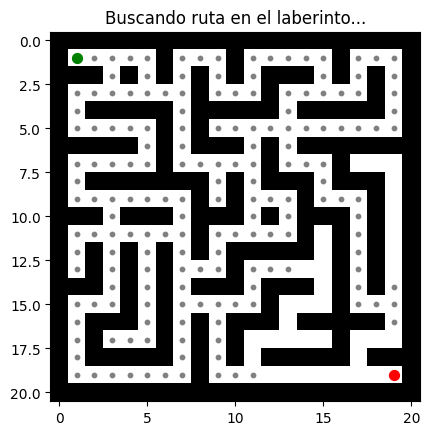

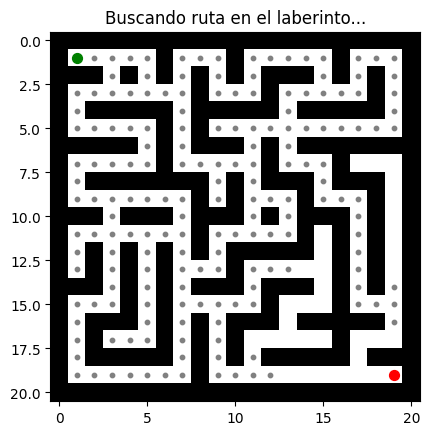

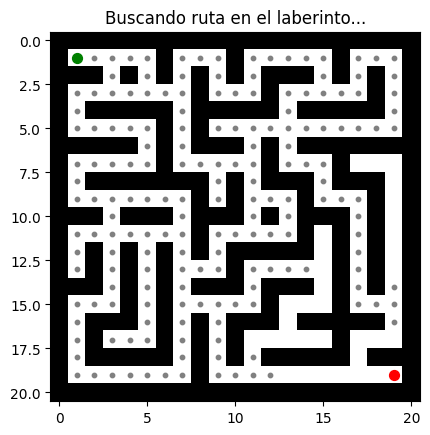

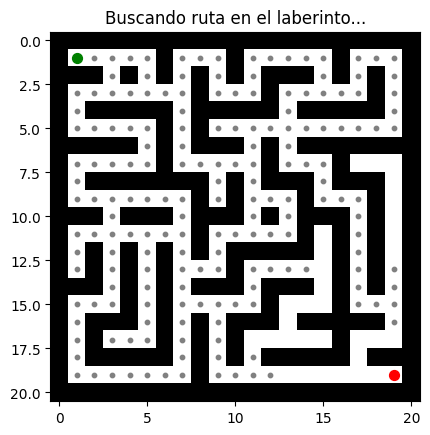

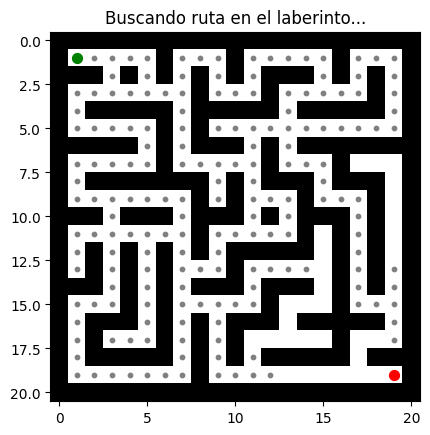

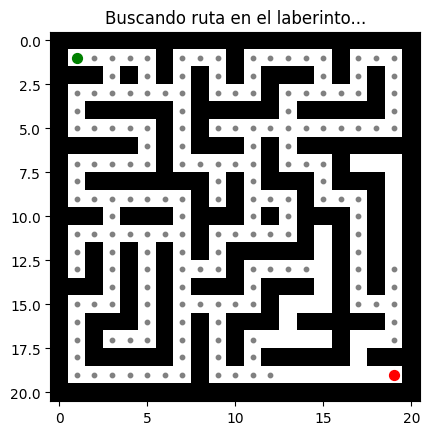

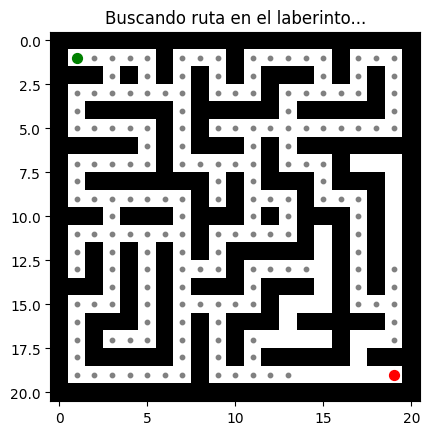

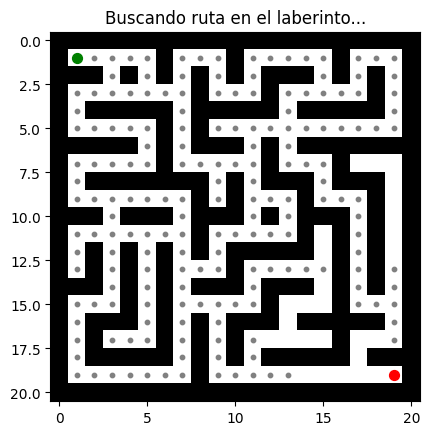

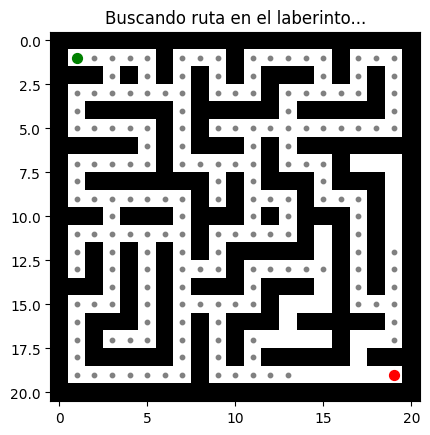

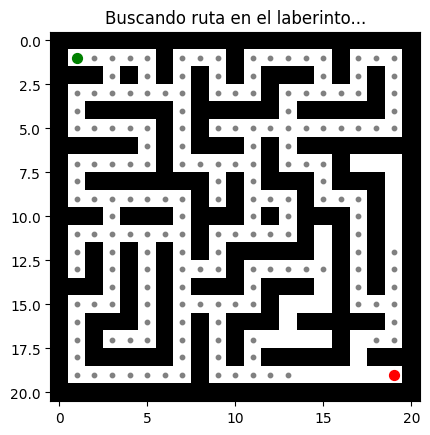

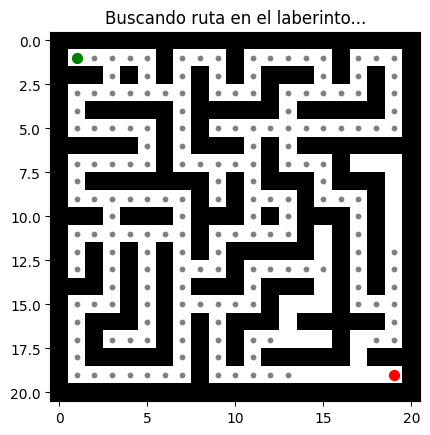

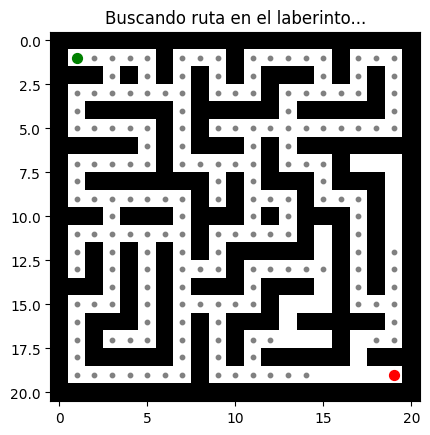

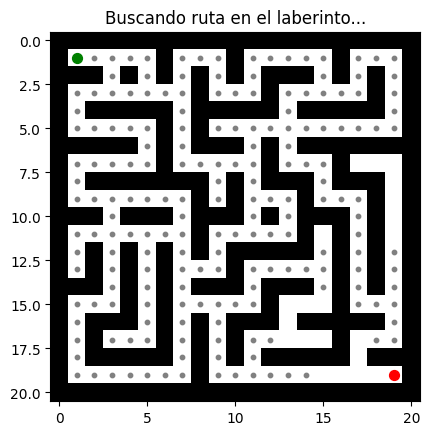

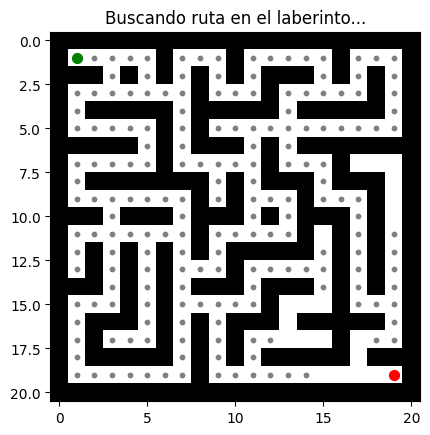

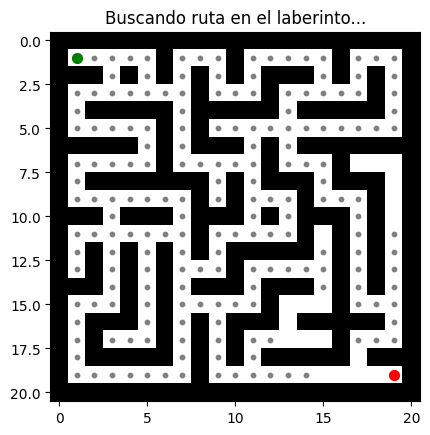

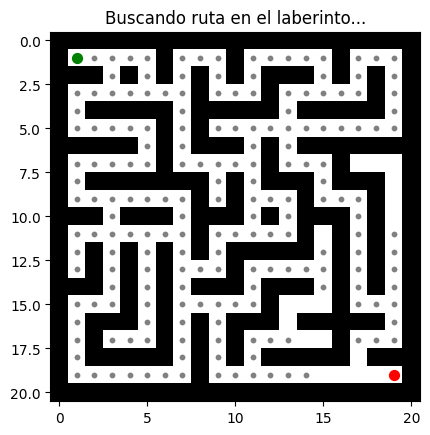

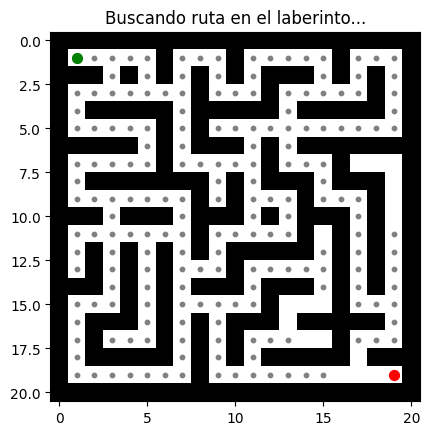

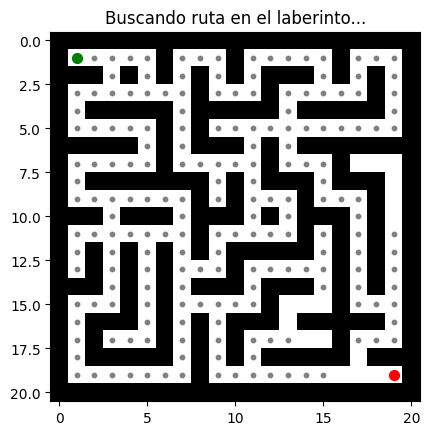

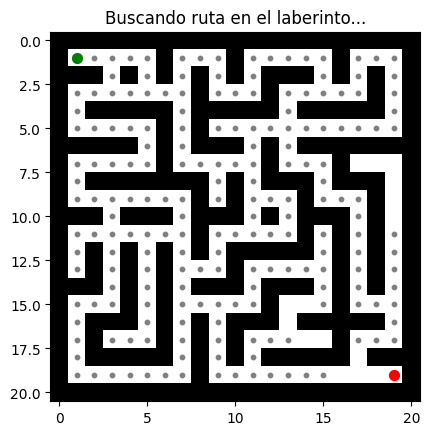

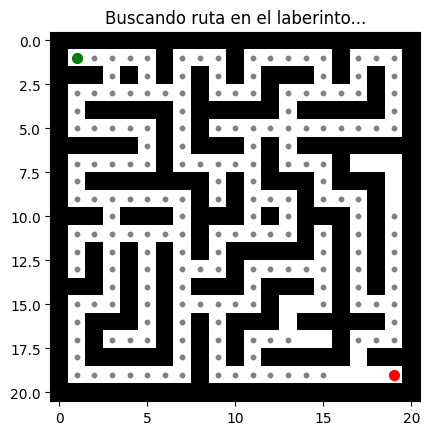

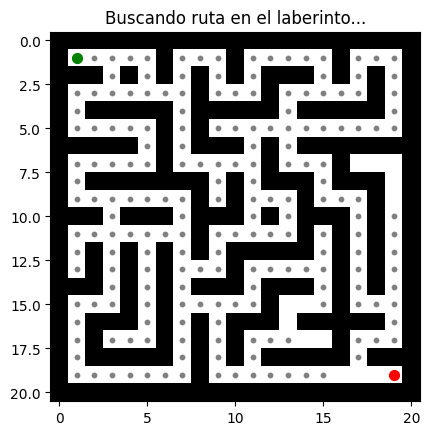

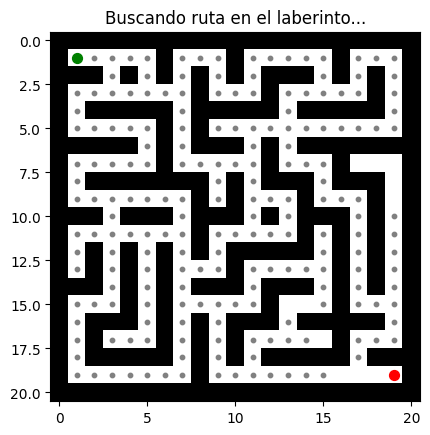

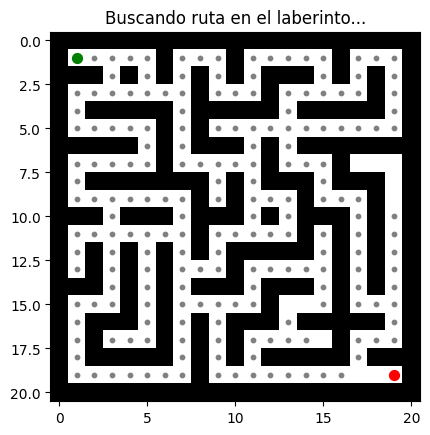

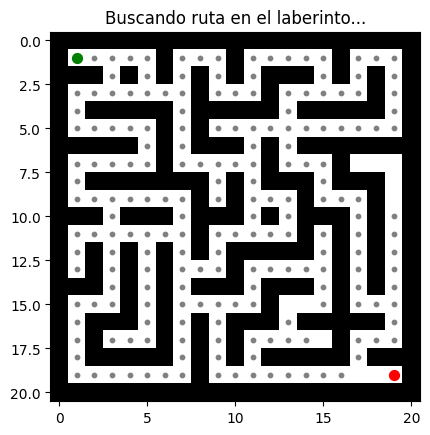

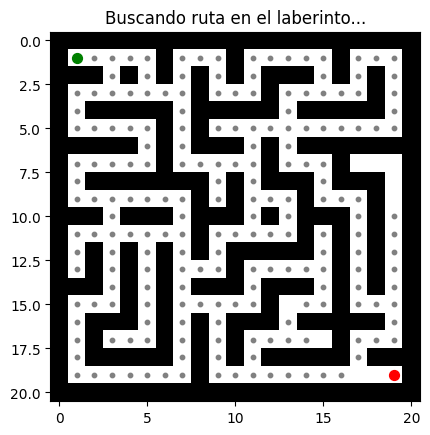

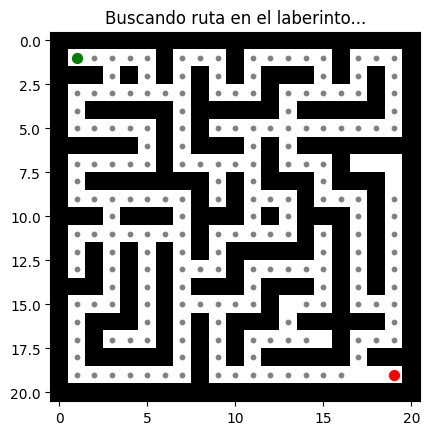

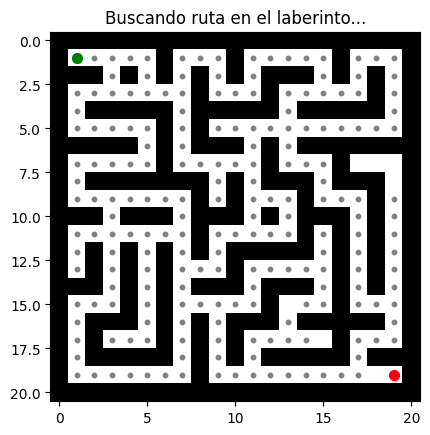

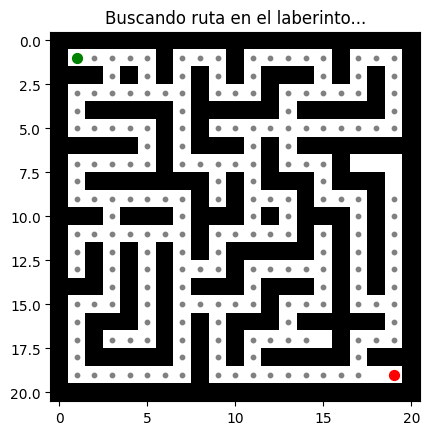

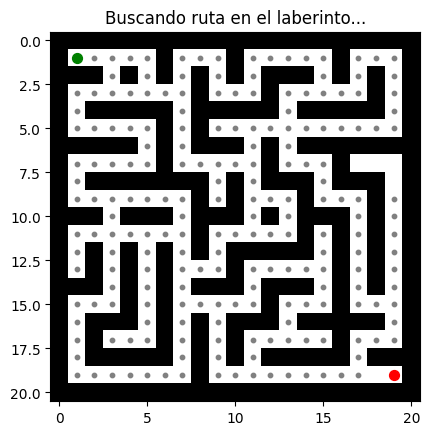

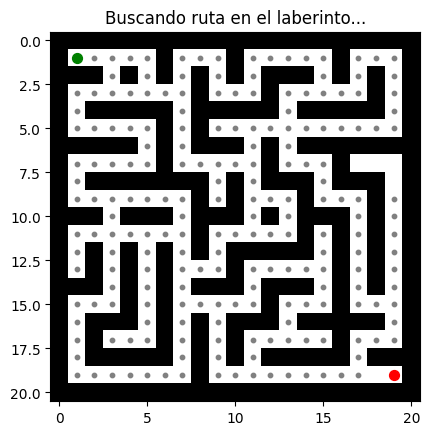

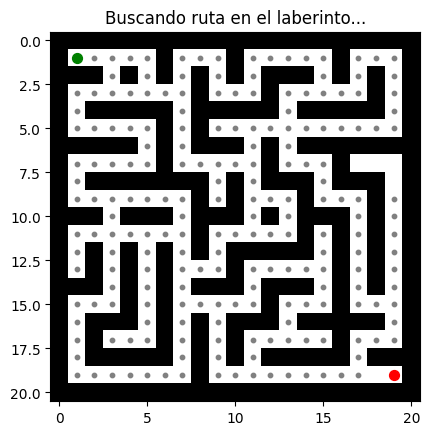

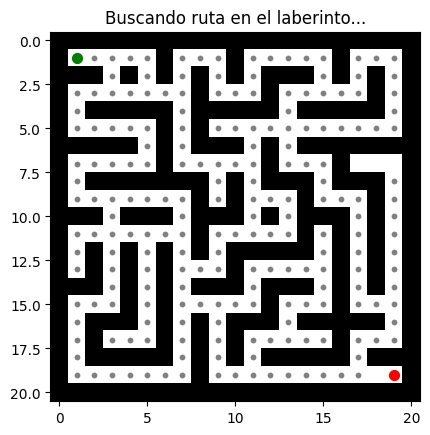

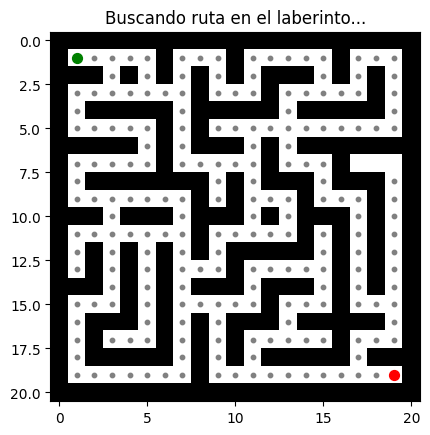

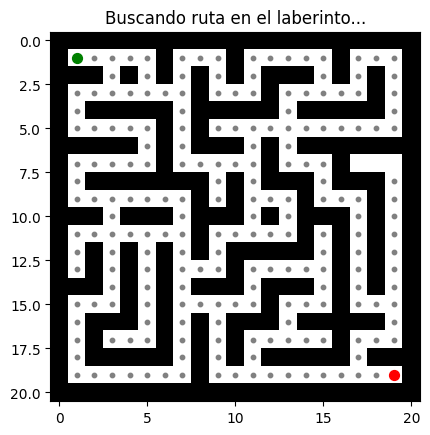

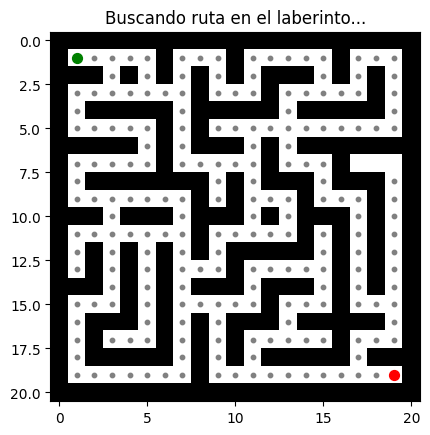

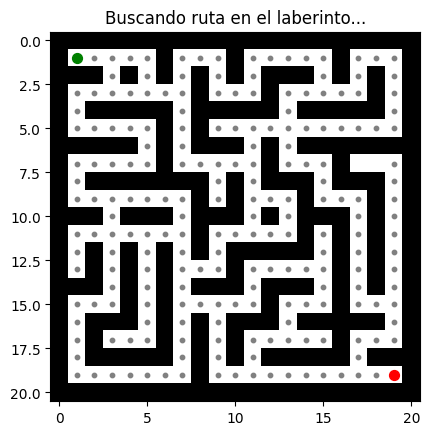

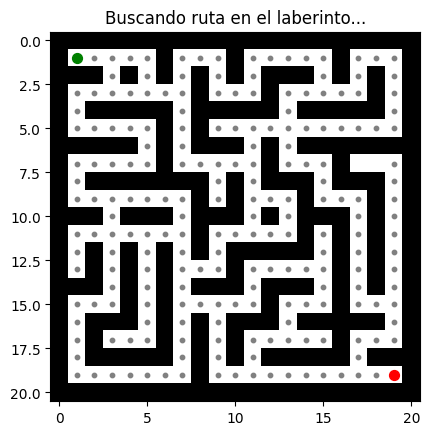

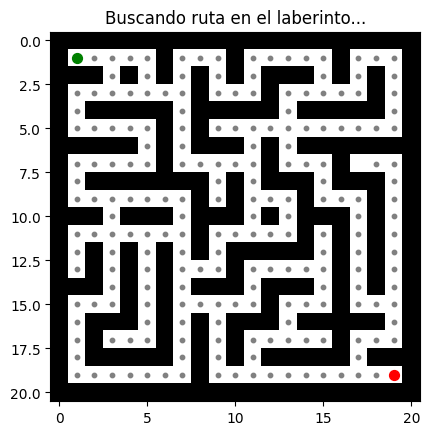

In [9]:

laberinto_np = np.array(laberinto_conectado, dtype=int)

inicio = (1,1)  # puedes ajustar la entrada
fin = (laberinto_np.shape[0]-2, laberinto_np.shape[1]-2)  # salida cerca de la esquina

ruta = resolver_laberinto_iterativo(laberinto_np, inicio, fin)
plt.close()


Con este codigo vemos cual seria la ruta mas optima para encontrar el objetivo


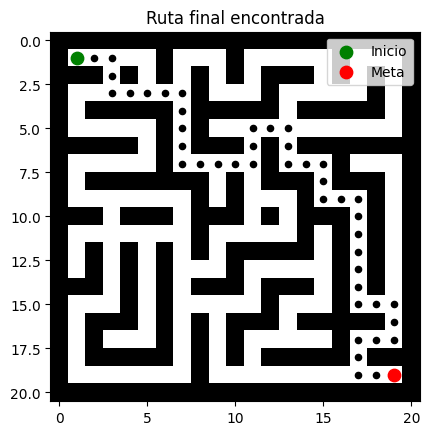

In [10]:
# Muestra el recorrido del laberinto completo }

def mostrar_ruta_final(laberinto, ruta, inicio, fin):
    plt.imshow(laberinto, cmap="binary")
    plt.title("Ruta final encontrada")

    # Dibujar la ruta en negro grueso
    for (x,y) in ruta:
        plt.scatter(y, x, c="black", s=20)

    plt.scatter(inicio[1], inicio[0], c="green", s=80, label="Inicio")
    plt.scatter(fin[1], fin[0], c="red", s=80, label="Meta")
    plt.legend()
    plt.show()

# Mostrar ruta completa
mostrar_ruta_final(laberinto_np, ruta, inicio, fin)


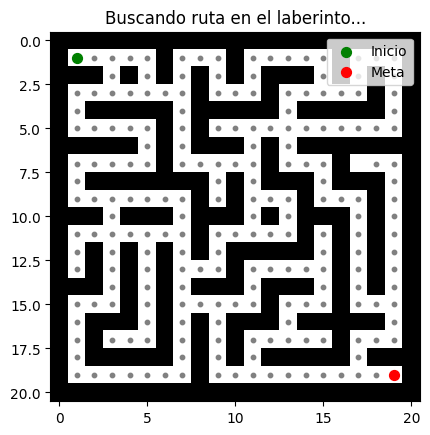

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

def explorar_laberinto(laberinto, inicio, fin):
    filas, columnas = laberinto.shape
    visitado = np.zeros_like(laberinto, dtype=bool)
    padre = dict()

    movimientos = [(-1,0),(1,0),(0,-1),(0,1)]
    cola = deque([inicio])
    visitado[inicio] = True
    
    while cola:
        actual = cola.popleft()
        if actual == fin:
            break
        for dx, dy in movimientos:
            nx, ny = actual[0] + dx, actual[1] + dy
            if 0 <= nx < filas and 0 <= ny < columnas:
                if laberinto[nx, ny] == 0 and not visitado[nx, ny]:
                    cola.append((nx, ny))
                    visitado[nx, ny] = True
                    padre[(nx, ny)] = actual
    return visitado

# Generar laberinto como array
laberinto_np = np.array(laberinto_conectado, dtype=int)

inicio = (1,1)
fin = (laberinto_np.shape[0]-2, laberinto_np.shape[1]-2)

# Obtener nodos visitados
visitado = explorar_laberinto(laberinto_np, inicio, fin)

# Graficar todo en una sola imagen
plt.imshow(laberinto_np, cmap="binary")
plt.title("Buscando ruta en el laberinto...")

# Pintar los nodos visitados en gris
visitados_y, visitados_x = np.where(visitado)
plt.scatter(visitados_x, visitados_y, c="grey", s=10)

# Marcar inicio y fin
plt.scatter(inicio[1], inicio[0], c="green", s=50, label="Inicio")
plt.scatter(fin[1], fin[0], c="red", s=50, label="Meta")

plt.legend()
plt.show()


En este codigo vimo como se resolvio todo el laberinto